# Introduction to unsupervised learning

Please, make a copy of this colaboratory in order to be able to make changes **(File -> Save a copy in Drive)**.


# Clustering


Setup for the second part


In [1]:
import numpy as np
import pandas as pd

# For plotting like a pro
!pip install -q plotnine
from plotnine import *

# ... matplotlib
import matplotlib.pyplot as plt

In [3]:
cluster_data = pd.DataFrame({'x':[2,3,3,5,6,7,7], 'y':[7,6,8,5,6,4,6]})

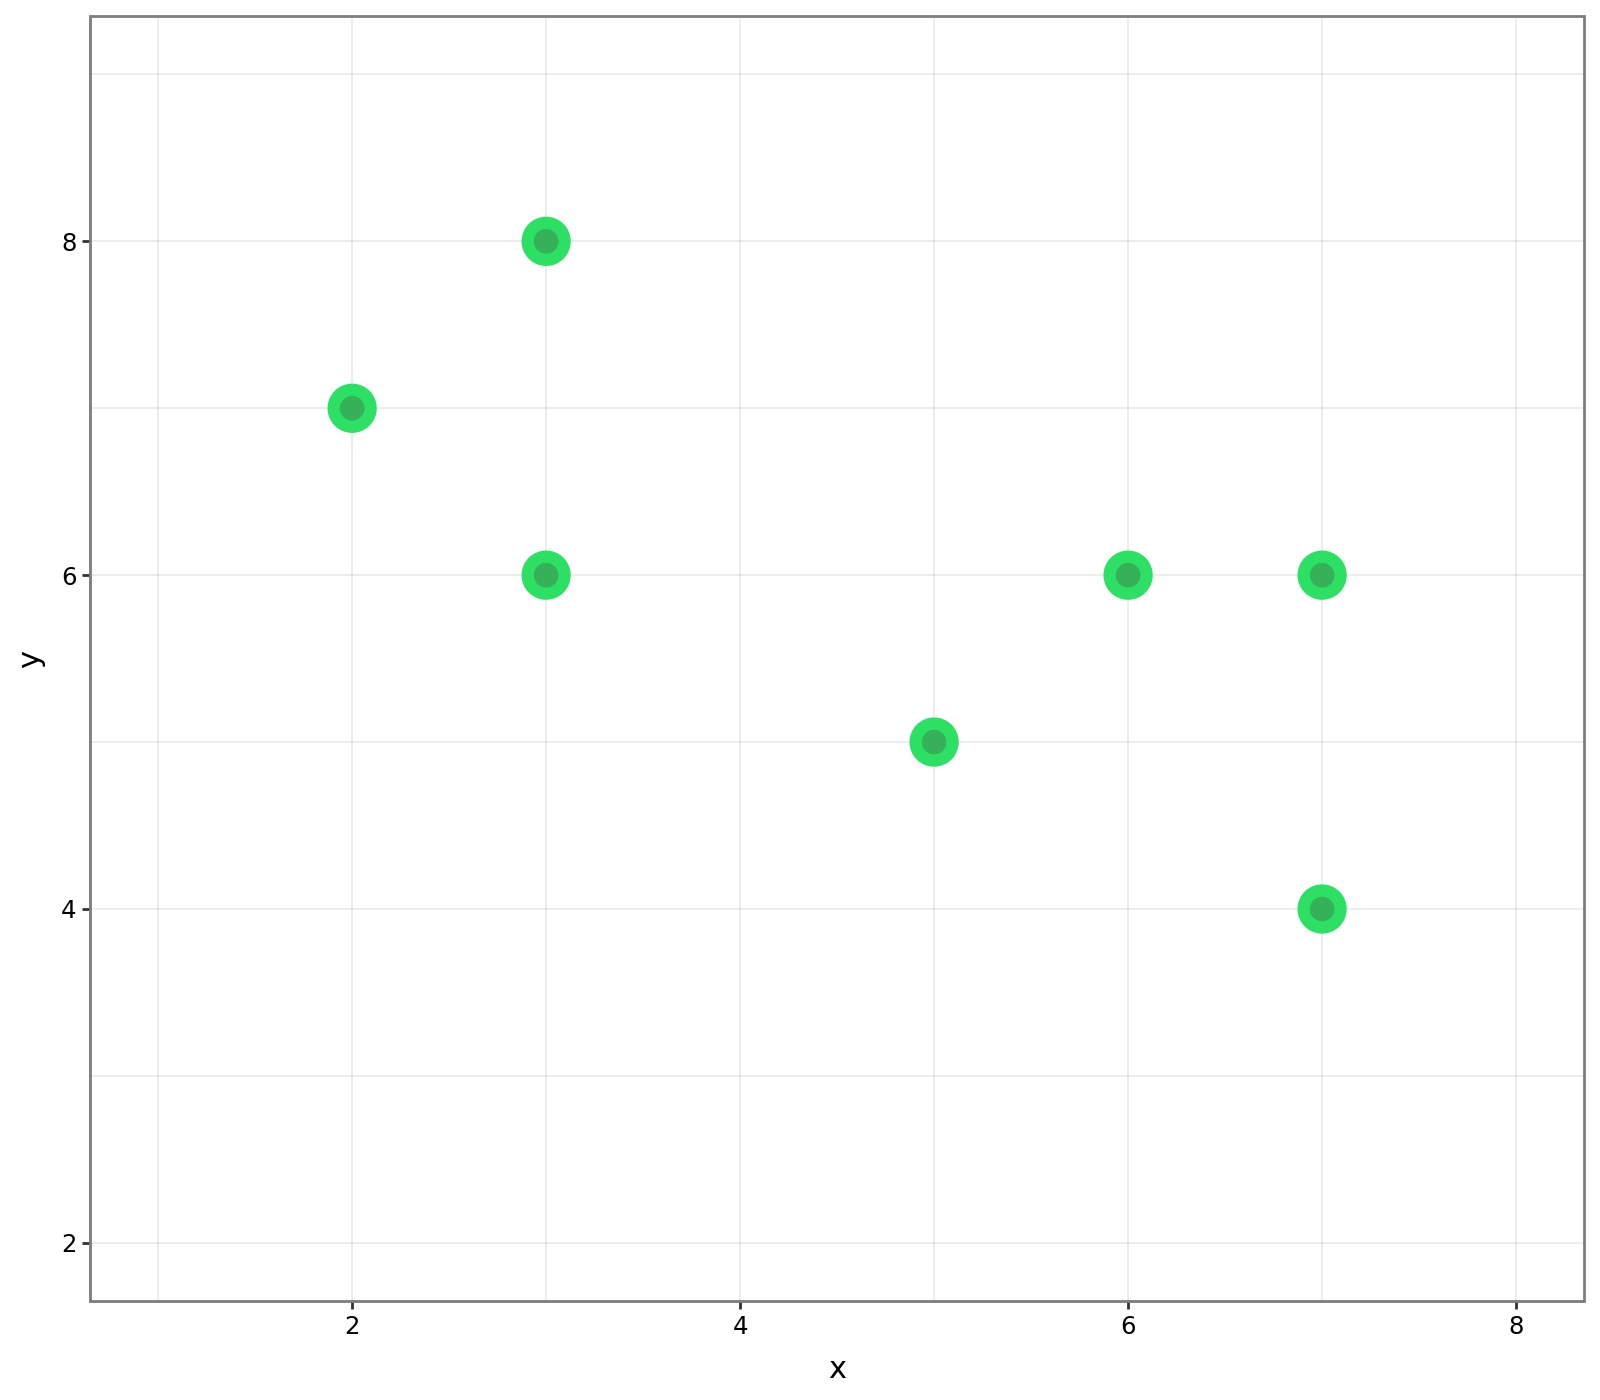

In [4]:
fig = (
    ggplot(data = cluster_data,
          mapping = aes(x = 'x', y = 'y')) +
    geom_point(fill = '#36B059',
               size = 5.0,
               stroke = 2.5,
               colour = '#2BE062',
               shape = 'o') +
    labs(
        title ='',
        x = 'x',
        y = 'y',
    ) +
    xlim(1, 8) +
    ylim(2, 9) +
    theme_bw() +
    theme(figure_size = (8, 7),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
)
fig

### Hierarchical clustering

We are going to implement hierarchical clustering, which was discussed in the lecture. Here we will work on a **bottom-up** or **agglomerative** approach to hierarchical clustering.


In [5]:
# We start with every point being in the different cluster
clusters = list([[0], [1], [2], [3], [4], [5], [6]])
print(clusters)

[[0], [1], [2], [3], [4], [5], [6]]


Calculate distances between all clusters using `sklearn`


In [6]:
from sklearn.metrics.pairwise import euclidean_distances
distances = euclidean_distances(cluster_data)
np.round(distances, 2)

array([[0.  , 1.41, 1.41, 3.61, 4.12, 5.83, 5.1 ],
       [1.41, 0.  , 2.  , 2.24, 3.  , 4.47, 4.  ],
       [1.41, 2.  , 0.  , 3.61, 3.61, 5.66, 4.47],
       [3.61, 2.24, 3.61, 0.  , 1.41, 2.24, 2.24],
       [4.12, 3.  , 3.61, 1.41, 0.  , 2.24, 1.  ],
       [5.83, 4.47, 5.66, 2.24, 2.24, 0.  , 2.  ],
       [5.1 , 4.  , 4.47, 2.24, 1.  , 2.  , 0.  ]])

In [ ]:
# [0][1] or [5][4] shows the distance between points 0-1 and 5-4
# [0][0] or [1][1] is the dist to it self

<font color=purple size=4>**Question**: Can you explain, what does this matrix show?
</font>


In [ ]:
# NB! We need to change 0 -> inf, so its not the shortest dist any more.
# [0][0] point to it self, so thats why we need to change it to infinity

In [8]:
distances[np.diag_indices(distances.shape[0])] = float('inf')
np.round(distances, 2)

array([[ inf, 1.41, 1.41, 3.61, 4.12, 5.83, 5.1 ],
       [1.41,  inf, 2.  , 2.24, 3.  , 4.47, 4.  ],
       [1.41, 2.  ,  inf, 3.61, 3.61, 5.66, 4.47],
       [3.61, 2.24, 3.61,  inf, 1.41, 2.24, 2.24],
       [4.12, 3.  , 3.61, 1.41,  inf, 2.24, 1.  ],
       [5.83, 4.47, 5.66, 2.24, 2.24,  inf, 2.  ],
       [5.1 , 4.  , 4.47, 2.24, 1.  , 2.  ,  inf]])

Find the smallest distance in distances matrix


In [9]:
np.min(distances)

np.float64(1.0)

<font color=purple size=4>**Question**: Can you find this distance manually in the above matrix? Between which clusters is this distance?
</font>


In [ ]:
# smallest dist is between 4-6

Now we shall find coordinates of this smallest distance


In [10]:
np.argmin(distances) # does not do what we want

np.int64(34)

In [ ]:
# 34 means pretty much flatmaped index... from 2d array

In [9]:
print(np.unravel_index(np.argmin(distances), distances.shape))

(np.int64(4), np.int64(6))


In this case coordinates represent cluster IDs. Assign each cluster index to its own variable (e.g. `fcluster` - index of the first cluster)


In [ ]:
##### YOUR CODE STARTS #####
(fcluster, scluster) = np.unravel_index(np.argmin(distances), distances.shape)
##### YOUR CODE ENDS #####

print(fcluster)
print(scluster)

4
6


In [15]:
print(f'The smallest distance is {distances[fcluster,scluster]}, between clusters {fcluster} and {scluster}')

The smallest distance is 1.0, between clusters 4 and 6


In [14]:
print(f'The smallest distance is {distances[fcluster][scluster]}, between clusters {fcluster} and {scluster}')

The smallest distance is 1.0, between clusters 4 and 6


#### For self study

Some Python insights before we move on. Imagine we want to copy a simple list, and change one value in it, what will happen?


In [16]:
simple_list = [0, 1, 2]
new_list = simple_list
new_list[2] = 3
simple_list, new_list

([0, 1, 3], [0, 1, 3])

This happens because we copy the reference, not the object. Let's copy the object:


In [17]:
import copy

simple_list = [0, 1, 2]
new_list = copy.copy(simple_list)  # simple_list = new_list[:] does the exact same thing
new_list[2] = 3
simple_list, new_list

([0, 1, 2], [0, 1, 3])

Great! But what if our list has references to other objects in it?


In [18]:
simple_list = [[0, 1], [2, 3]]
new_list = copy.copy(simple_list)
new_list[1][1] = 4
simple_list, new_list

([[0, 1], [2, 4]], [[0, 1], [2, 4]])

See, copy.copy copies only the object, but the inner references to other objects remain the same. We need a stronger tool here.


In [19]:
simple_list = [[0, 1], [2, 3]]
new_list = copy.deepcopy(simple_list)
new_list[1][1] = 4
simple_list, new_list

([[0, 1], [2, 3]], [[0, 1], [2, 4]])

But what if we have a numpy array?


In [20]:
simple_list = np.array([[0, 1], [2, 3]])
new_list = copy.copy(simple_list)
new_list[1][1] = 4
print(simple_list)
print(new_list)

[[0 1]
 [2 3]]
[[0 1]
 [2 4]]


For numpy arrays copy.copy is enough, because the array has a solid structure and has no reference to mutable objects inside. However, numpy and pandas have their own **copy()** method.


In [21]:
simple_list = np.array([[0, 1], [2, 3]])
new_list = simple_list.copy()
new_list[1][1] = 4
simple_list, new_list

(array([[0, 1],
        [2, 3]]),
 array([[0, 1],
        [2, 4]]))

### Hierarchical clustering (continuing)

Let's merge the two clusters (columns and rows of the matrix), preserving the smallest distance to other clusters from this new cluster (via single linkage)


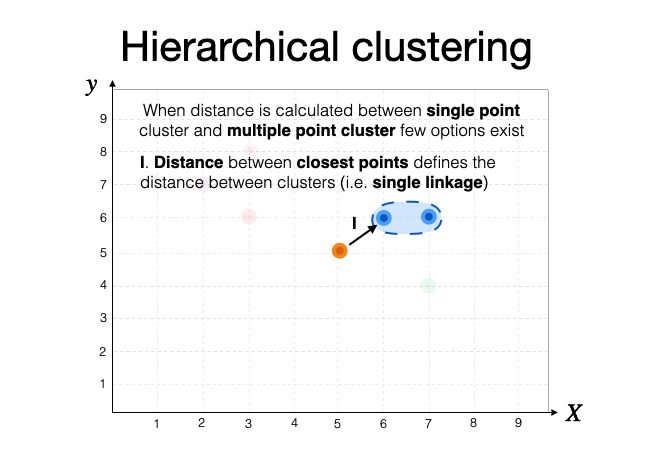


At first, let's decide on two clusters that we will merge (4 and 6) and make a copy of the original distance matrix (before we merge two clusters and change it).


In [33]:
# Given
fcluster = 4
scluster = 6

# copy the distances correctly
##### YOUR CODE STARTS #####
new_distances = distances.copy()
##### YOUR CODE ENDS #####

print(np.round(new_distances, 2))

[[ inf 1.41 1.41 3.61 4.12 5.83 5.1 ]
 [1.41  inf 2.   2.24 3.   4.47 4.  ]
 [1.41 2.    inf 3.61 3.61 5.66 4.47]
 [3.61 2.24 3.61  inf 1.41 2.24 2.24]
 [4.12 3.   3.61 1.41  inf 2.24 1.  ]
 [5.83 4.47 5.66 2.24 2.24  inf 2.  ]
 [5.1  4.   4.47 2.24 1.   2.    inf]]


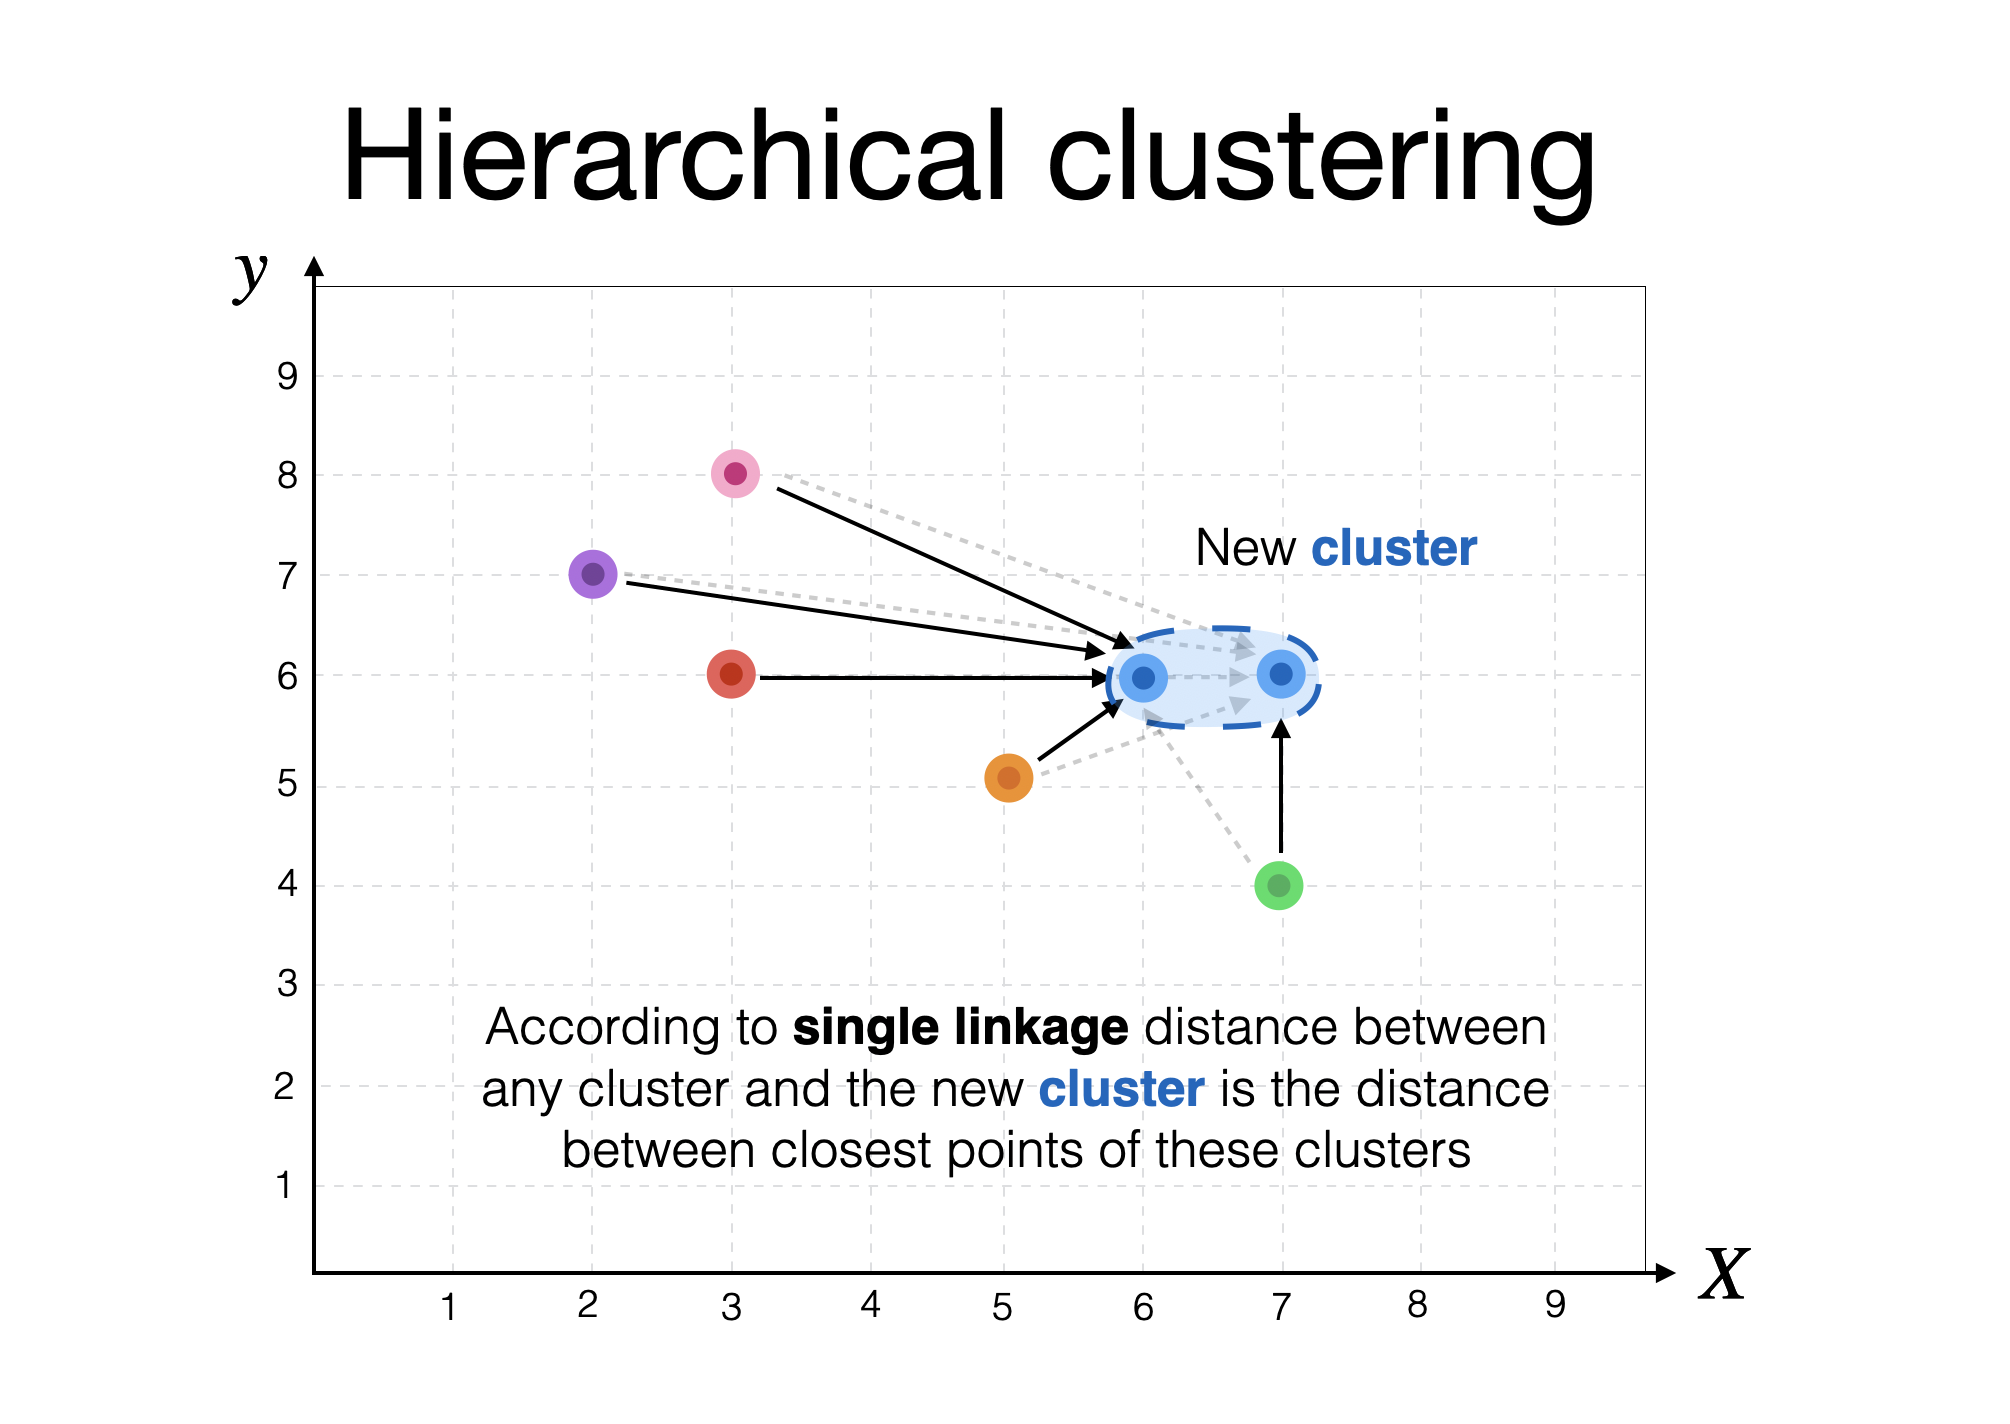


In order to merge the two clusters we need to copy into the `fcluster` row and column smallest values from both `fcluster` and `scluster`. This way our merged cluster will occupy the same id as `fcluster` but will contain only the shortest distances to both old `fcluster` and `scluster`.


In [23]:
distances[fcluster,:]

array([4.12310563, 3.        , 3.60555128, 1.41421356,        inf,
       2.23606798, 1.        ])

In [24]:
distances[scluster,:]

array([5.09901951, 4.        , 4.47213595, 2.23606798, 1.        ,
       2.        ,        inf])

In [ ]:
# You keep the smallest value from both rows..., because we chose single linkage
# 	so if fcluster[0] is smaller then scluster[0] then you keen fcluster
#	if scluster[5] is smaller than flcuster[5] then you keep scluster

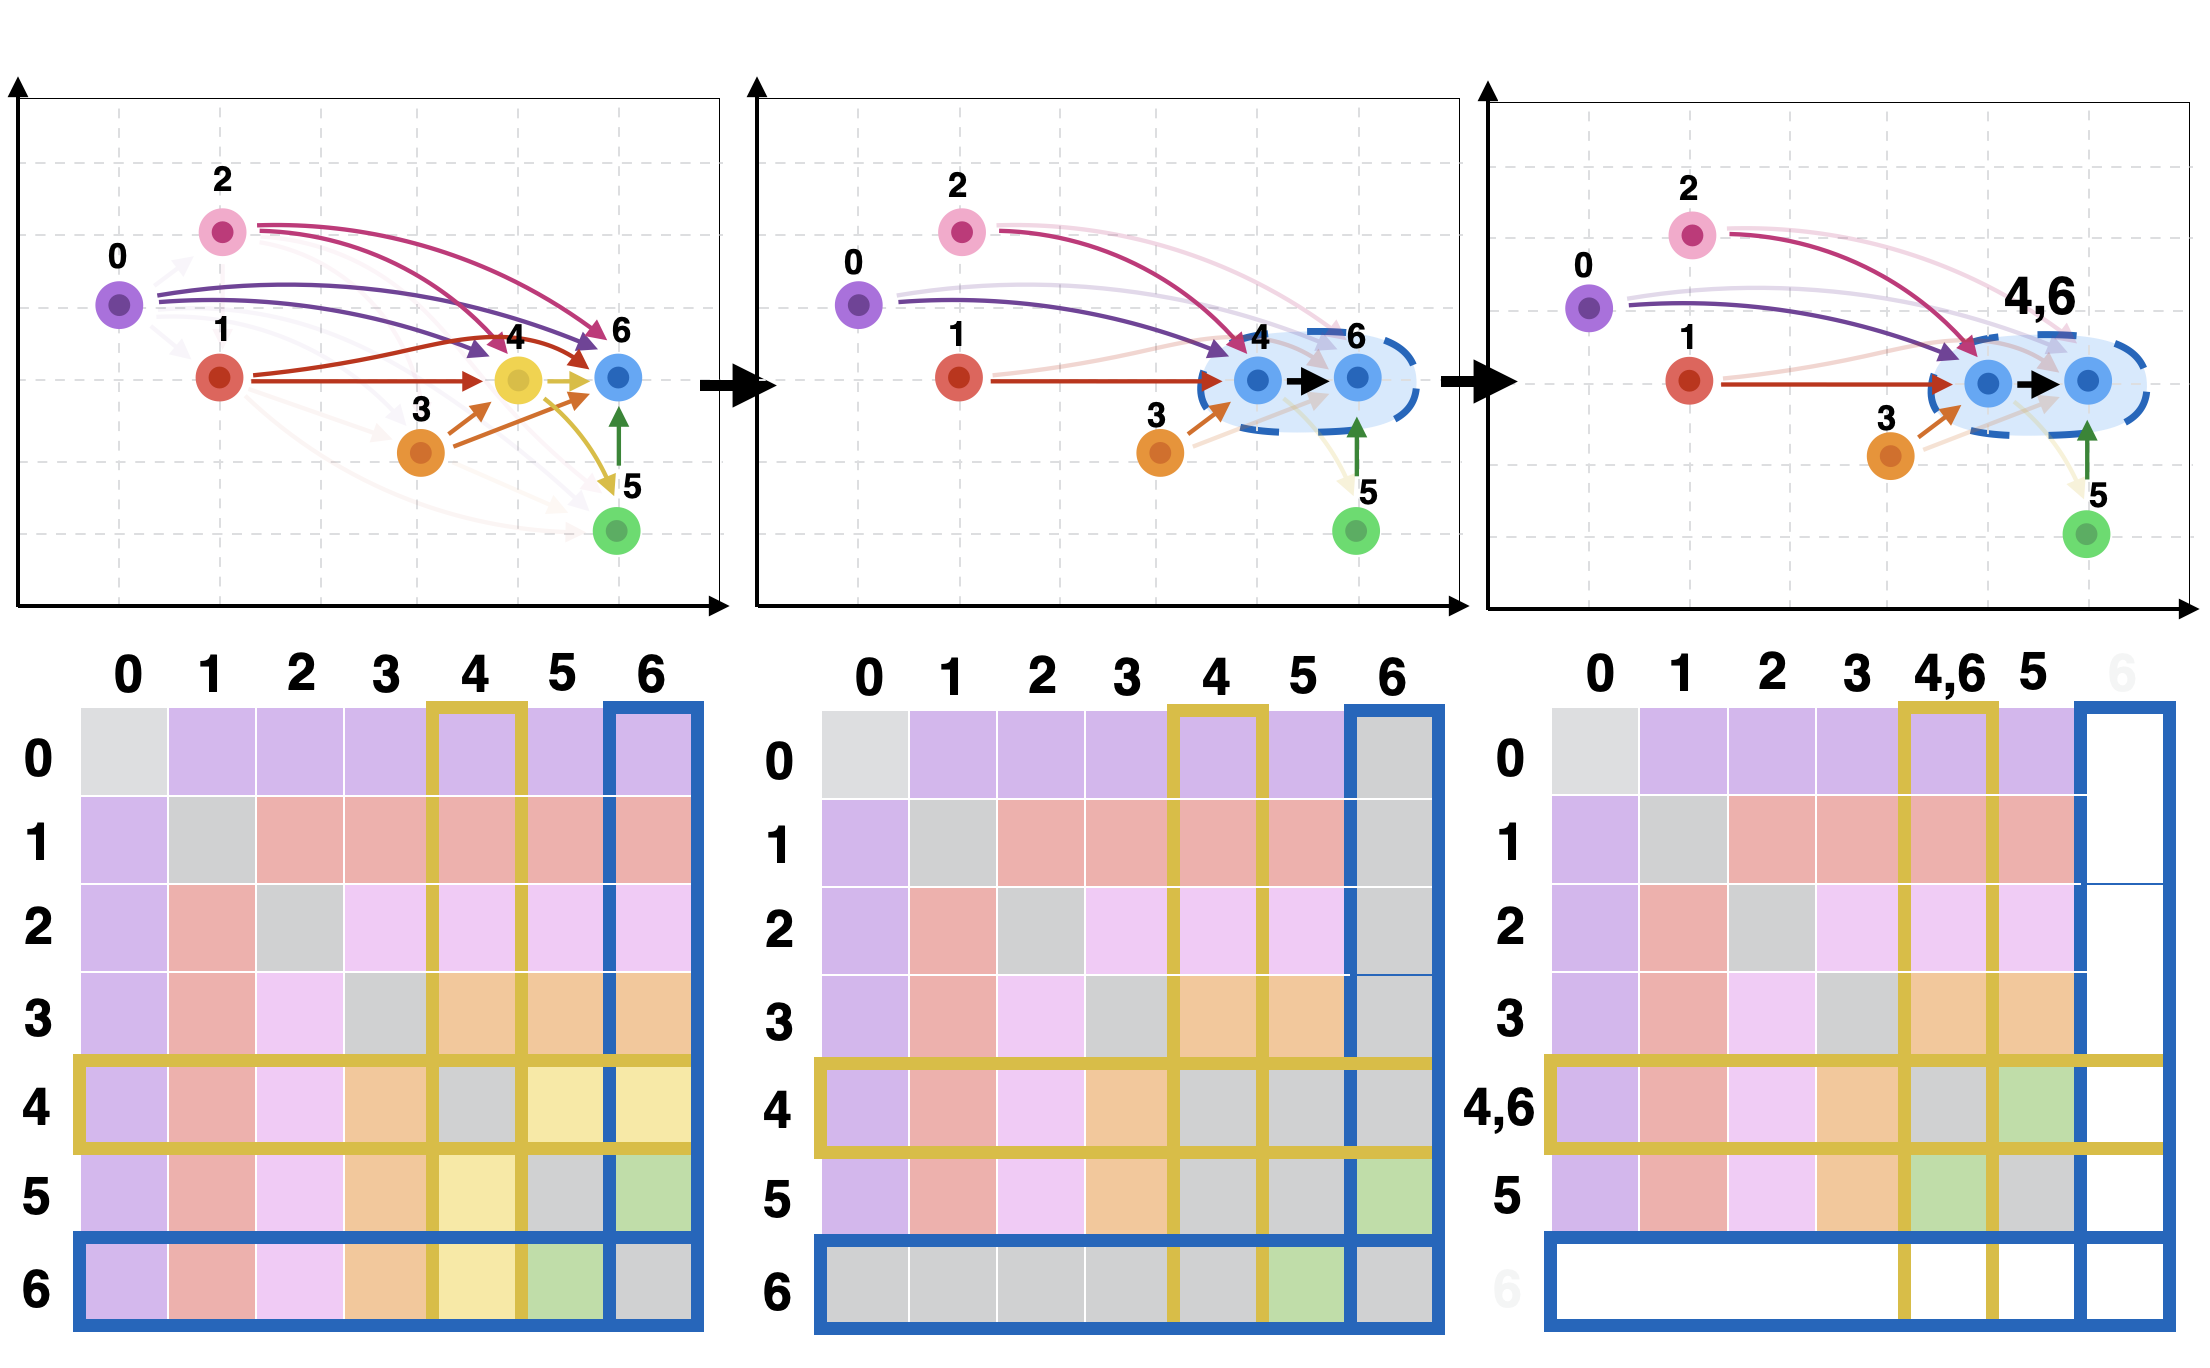


In [ ]:
for i in np.arange(distances.shape[0]):
  if distances[fcluster, i] > distances[scluster, i]:
    ##### YOUR CODE STARTS #####
    new_distances[fcluster, i] = distances[scluster][i]
    new_distances[i, fcluster] = distances[i][scluster] # or distances[scluster][i], but it doesnt matter, becuase matrix is symetric
    ##### YOUR CODE ENDS #####

In [36]:
np.round(distances, 2)

array([[ inf, 1.41, 1.41, 3.61, 4.12, 5.83, 5.1 ],
       [1.41,  inf, 2.  , 2.24, 3.  , 4.47, 4.  ],
       [1.41, 2.  ,  inf, 3.61, 3.61, 5.66, 4.47],
       [3.61, 2.24, 3.61,  inf, 1.41, 2.24, 2.24],
       [4.12, 3.  , 3.61, 1.41,  inf, 2.24, 1.  ],
       [5.83, 4.47, 5.66, 2.24, 2.24,  inf, 2.  ],
       [5.1 , 4.  , 4.47, 2.24, 1.  , 2.  ,  inf]])

In [35]:
print(new_distances.shape)
np.round(new_distances, 2)

(7, 7)


array([[ inf, 1.41, 1.41, 3.61, 4.12, 5.83, 5.1 ],
       [1.41,  inf, 2.  , 2.24, 3.  , 4.47, 4.  ],
       [1.41, 2.  ,  inf, 3.61, 3.61, 5.66, 4.47],
       [3.61, 2.24, 3.61,  inf, 1.41, 2.24, 2.24],
       [4.12, 3.  , 3.61, 1.41, 1.  , 2.  , 1.  ],
       [5.83, 4.47, 5.66, 2.24, 2.  ,  inf, 2.  ],
       [5.1 , 4.  , 4.47, 2.24, 1.  , 2.  ,  inf]])

<font color=purple size=4>**Question**: Did anything change in this matrix?
</font>


Now that our new merged cluster is occupying the space of the old `fcluster` we can remove the row and column of the `scluster` as well as restore the main diagonal.


In [37]:
# Remove scluster all together
new_distances = np.delete(new_distances, scluster, 0)
new_distances = np.delete(new_distances, scluster, 1)

# Main diagonal should have infinity values
new_distances[np.diag_indices(new_distances.shape[0])] = float('inf')

In [38]:
print(new_distances.shape)
np.round(new_distances, 2)

(6, 6)


array([[ inf, 1.41, 1.41, 3.61, 4.12, 5.83],
       [1.41,  inf, 2.  , 2.24, 3.  , 4.47],
       [1.41, 2.  ,  inf, 3.61, 3.61, 5.66],
       [3.61, 2.24, 3.61,  inf, 1.41, 2.24],
       [4.12, 3.  , 3.61, 1.41,  inf, 2.  ],
       [5.83, 4.47, 5.66, 2.24, 2.  ,  inf]])

In [39]:
# append a scluster to fcluster
clusters[fcluster] += clusters[scluster]
print(clusters)

[[0], [1], [2], [3], [4, 6], [5], [6]]


In [40]:
# remove scluster from clusters (as it now lives elsewhere)
clusters.pop(scluster)
print(clusters)

[[0], [1], [2], [3], [4, 6], [5]]


**Classroom exercise** complete the function `merge_clusters` below:


In [44]:
def merge_clusters(distances, fcluster, scluster):
  # Deep copying here
  new_distances = distances.copy()
  ##### YOUR CODE STARTS #####
  for i in np.arange(distances.shape[0]):
    if distances[fcluster, i] > distances[scluster, i]:
      new_distances[fcluster, i] = distances[scluster][i]
      new_distances[i, fcluster] = distances[i][scluster]

  # Remove scluster all together
  new_distances = np.delete(new_distances, scluster, 0)
  new_distances = np.delete(new_distances, scluster, 1)

  # Main diagonal should have infinity values
  new_distances[np.diag_indices(new_distances.shape[0])] = float('inf')
  ##### YOUR CODE ENDS #####

  return(new_distances)

In [45]:
np.round(merge_clusters(distances, 4, 6), 2)

array([[ inf, 1.41, 1.41, 3.61, 4.12, 5.83],
       [1.41,  inf, 2.  , 2.24, 3.  , 4.47],
       [1.41, 2.  ,  inf, 3.61, 3.61, 5.66],
       [3.61, 2.24, 3.61,  inf, 1.41, 2.24],
       [4.12, 3.  , 3.61, 1.41,  inf, 2.  ],
       [5.83, 4.47, 5.66, 2.24, 2.  ,  inf]])

Let's complete the algorithm of the hierarchical clustering (bottom-up):


In [46]:
clusters = list([[0], [1], [2], [3], [4], [5], [6]])

new_distances = distances.copy() # because it's a numpy array

# array of storing distances between clusters
minimal_distances = np.zeros(distances.shape[0]-1)

# Let's keep track of merging sequence
merging_history = list()
merging_history.append(copy.deepcopy(clusters)) # because it's a list of lists

for step in np.arange(distances.shape[0]):
  if (new_distances.shape[0] == 1):
    break

  ##### YOUR CODE STARTS #####
  minimal_distances[step] = np.min(new_distances)
  (fcluster, scluster) = np.unravel_index(np.argmin(new_distances), new_distances.shape)

  # merge clusters f and s
  new_distances = merge_clusters(new_distances, fcluster, scluster)

  ##### YOUR CODE ENDS #####

  # update clusters
  clusters[fcluster] += copy.deepcopy(clusters[scluster])
  clusters.pop(scluster)

  # add current clustering to the history
  merging_history.append(copy.deepcopy(clusters))

[print(f'Step {i}: {history}') for i, history in enumerate(merging_history)]
print(f'Minimal distances between clusters: {np.round(minimal_distances, 2)}')

Step 0: [[0], [1], [2], [3], [4], [5], [6]]
Step 1: [[0], [1], [2], [3], [4, 6], [5]]
Step 2: [[0, 1], [2], [3], [4, 6], [5]]
Step 3: [[0, 1, 2], [3], [4, 6], [5]]
Step 4: [[0, 1, 2], [3, 4, 6], [5]]
Step 5: [[0, 1, 2], [3, 4, 6, 5]]
Step 6: [[0, 1, 2, 3, 4, 6, 5]]
Minimal distances between clusters: [1.   1.41 1.41 1.41 2.   2.24]


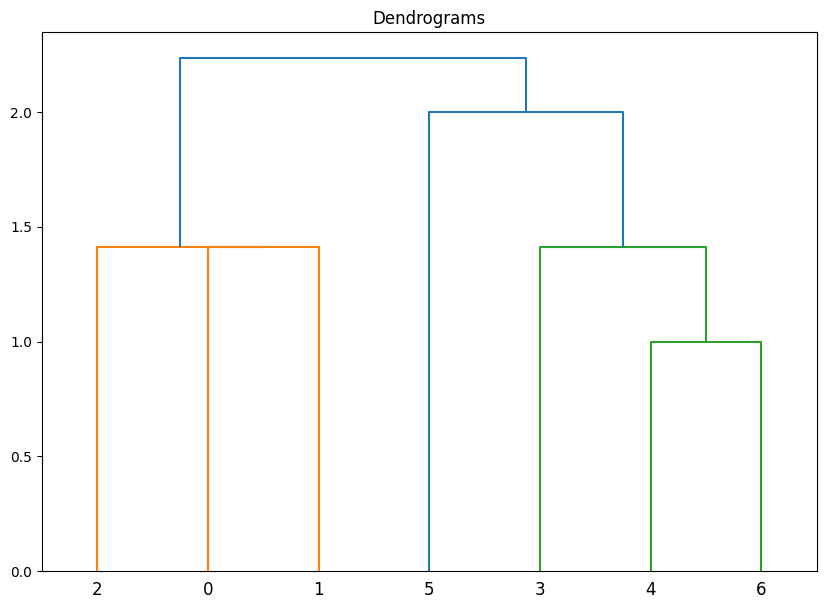

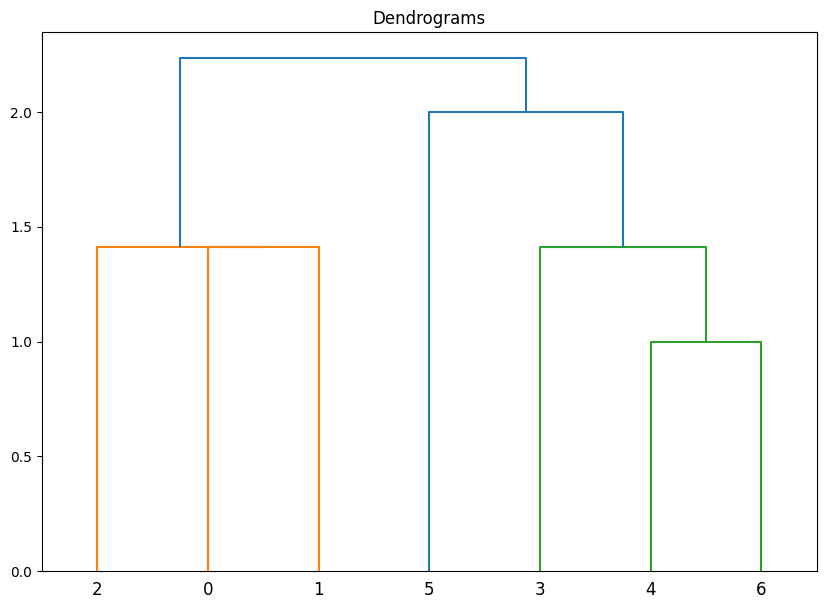

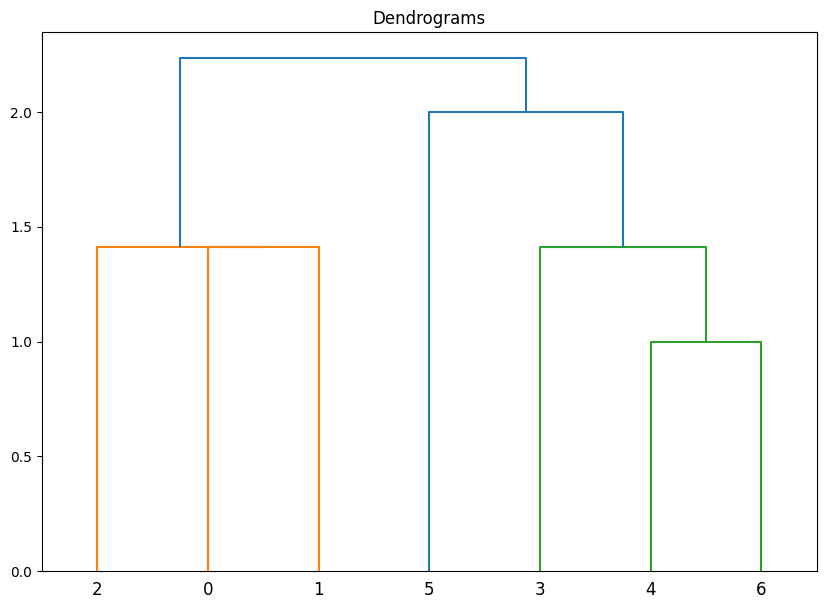

In [49]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(cluster_data, method='single'))

plt.show()

## Hierarchical clustering in `sklearn`

In `sklearn` hierarchical bottom-up clustering is called **agglomerative** clustering.


In [52]:
from sklearn.cluster import AgglomerativeClustering
np.random.seed(111)

# We create clustering
clustering = AgglomerativeClustering(n_clusters = 2, linkage = 'single').fit(cluster_data)

# Extract clusters
cluster_data['clusters'] = clustering.labels_
cluster_data['clusters'] = cluster_data['clusters'].astype('category')

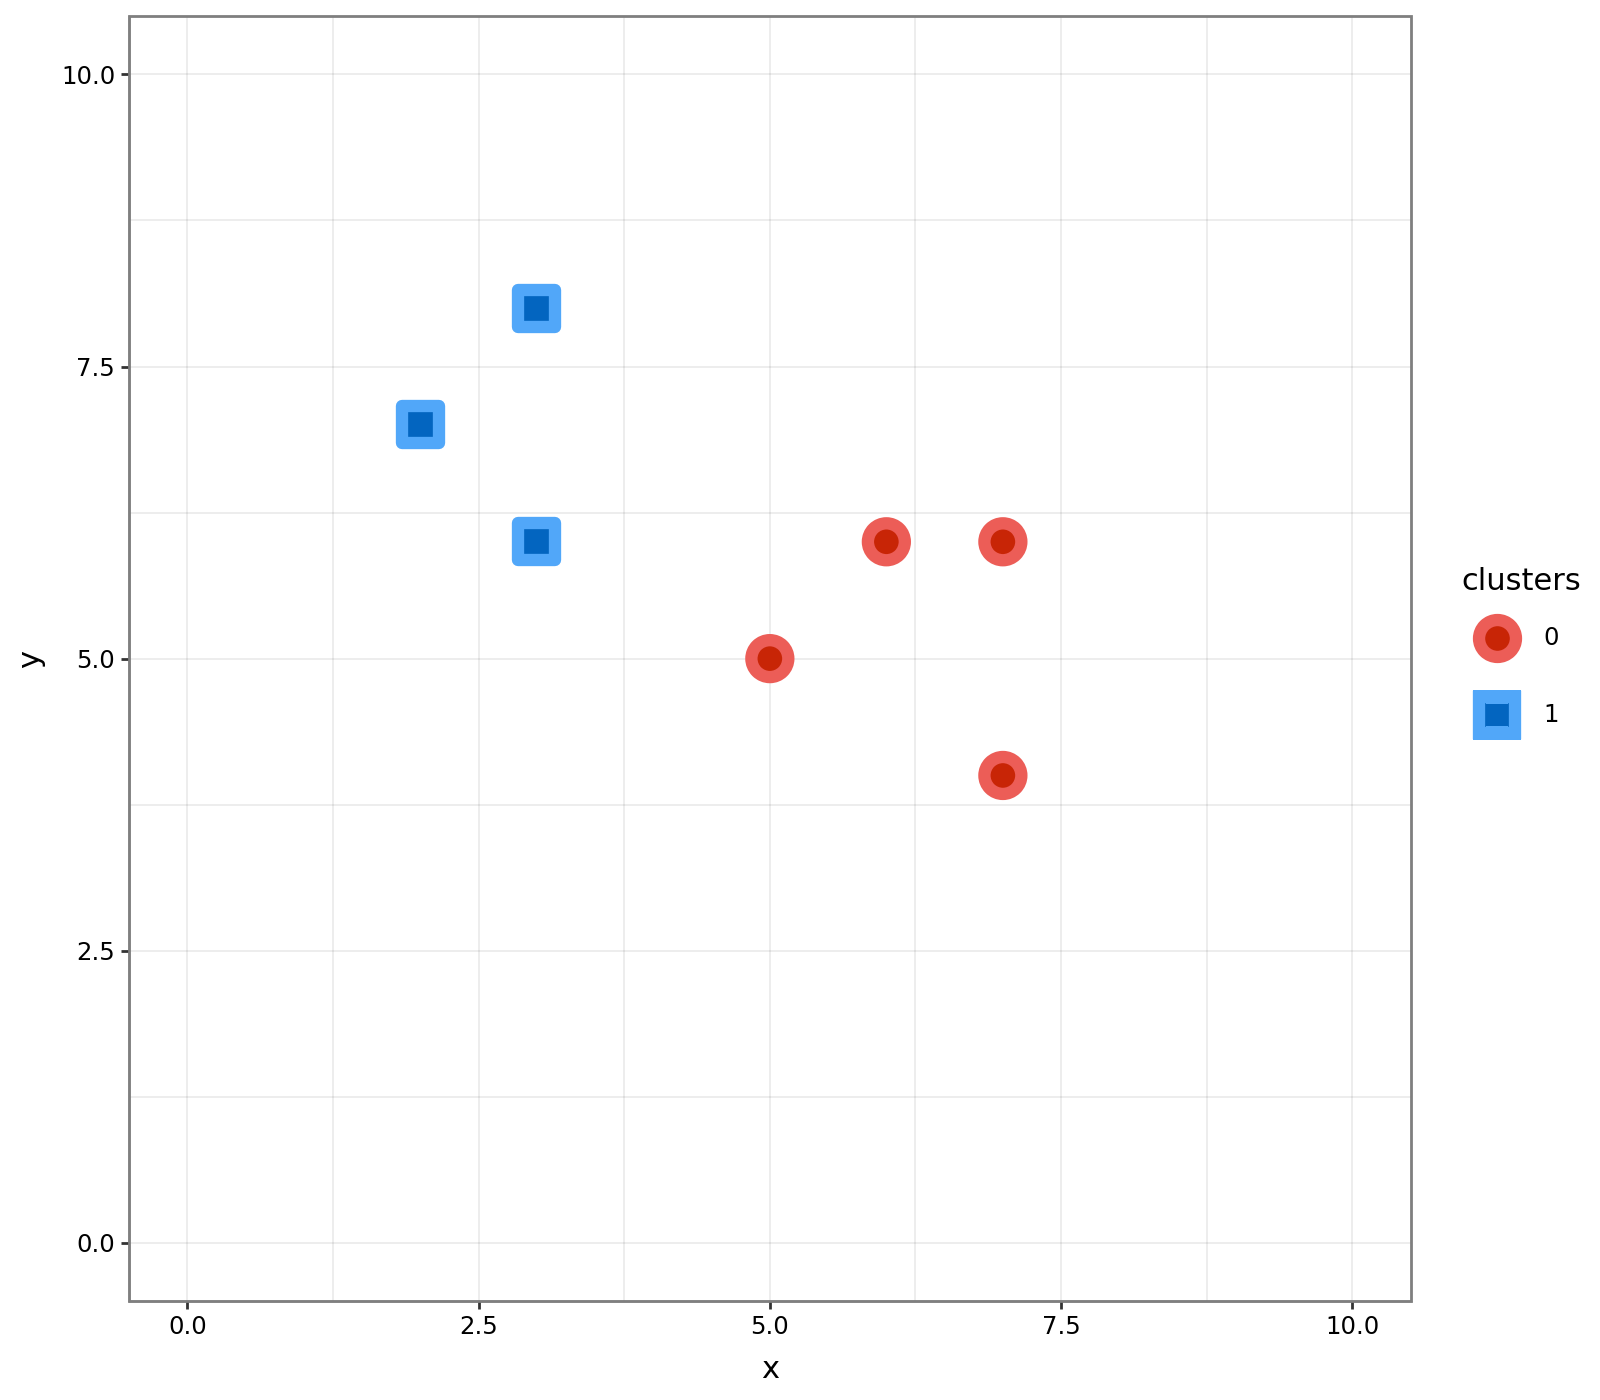

In [53]:
fig = (
    ggplot(data = cluster_data,
          mapping = aes(x = 'x', y = 'y')) +
    geom_point(aes(colour = 'clusters',
                   shape = 'clusters',
                   fill = 'clusters'),
               size = 5.0,
               stroke = 2.5) +
    labs(
        title ='',
        x = 'x',
        y = 'y',
    ) +
    xlim(0, 10) +
    ylim(0, 10) +
    theme_bw() +
    scale_color_manual(['#EC5D57', '#51A7F9']) +
    scale_fill_manual(['#C82506', '#0365C0']) +
    scale_shape_manual(['o', 's']) +
    theme(figure_size = (8, 7),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
)

fig

In [54]:
np.random.seed(111)

# change the parameters as we can cut the tree earlier
clustering = AgglomerativeClustering(n_clusters = 7, linkage = 'single').fit(cluster_data)
cluster_data['clusters'] = clustering.labels_
cluster_data['clusters'] = cluster_data['clusters'].astype('category')

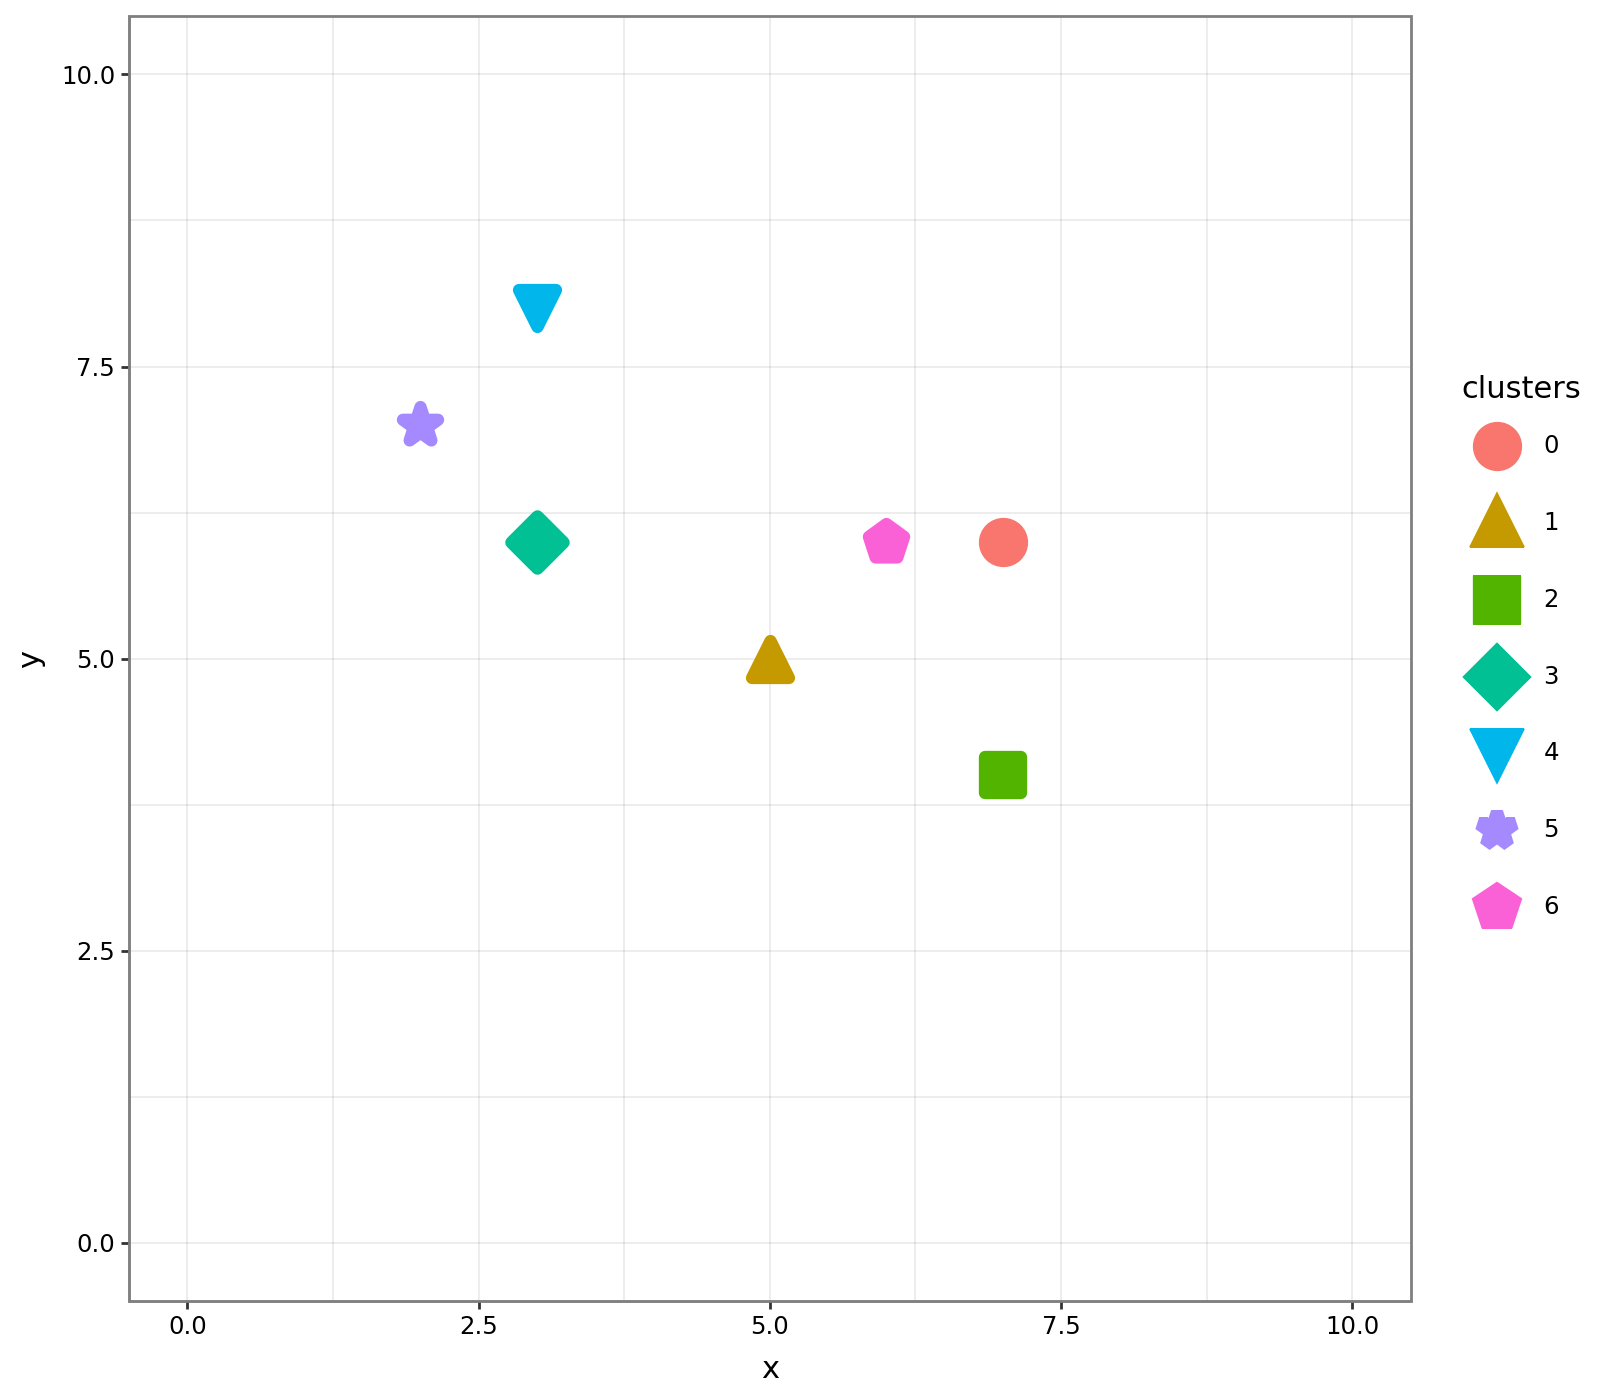

In [55]:
fig = (
    ggplot(data = cluster_data,
          mapping = aes(x = 'x', y = 'y')) +
    geom_point(aes(colour = 'clusters',
                   shape = 'clusters',
                   fill = 'clusters'),
               size = 5.0,
               stroke = 2.5) +
    labs(
        title ='',
        x = 'x',
        y = 'y',
    ) +
    xlim(0, 10) +
    ylim(0, 10) +
    theme_bw() +
    theme(figure_size = (8, 7),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
)
fig

## K-Means

Here you can make an advantage of having `sklearn` without a need to implement K-Means yourself (you can still do it as the bonus exercise :))


In [56]:
from sklearn.cluster import KMeans
clustering = KMeans(n_clusters=3, random_state=111).fit(cluster_data)
cluster_data['clusters'] = clustering.labels_
cluster_data['clusters'] = cluster_data['clusters'].astype('category')

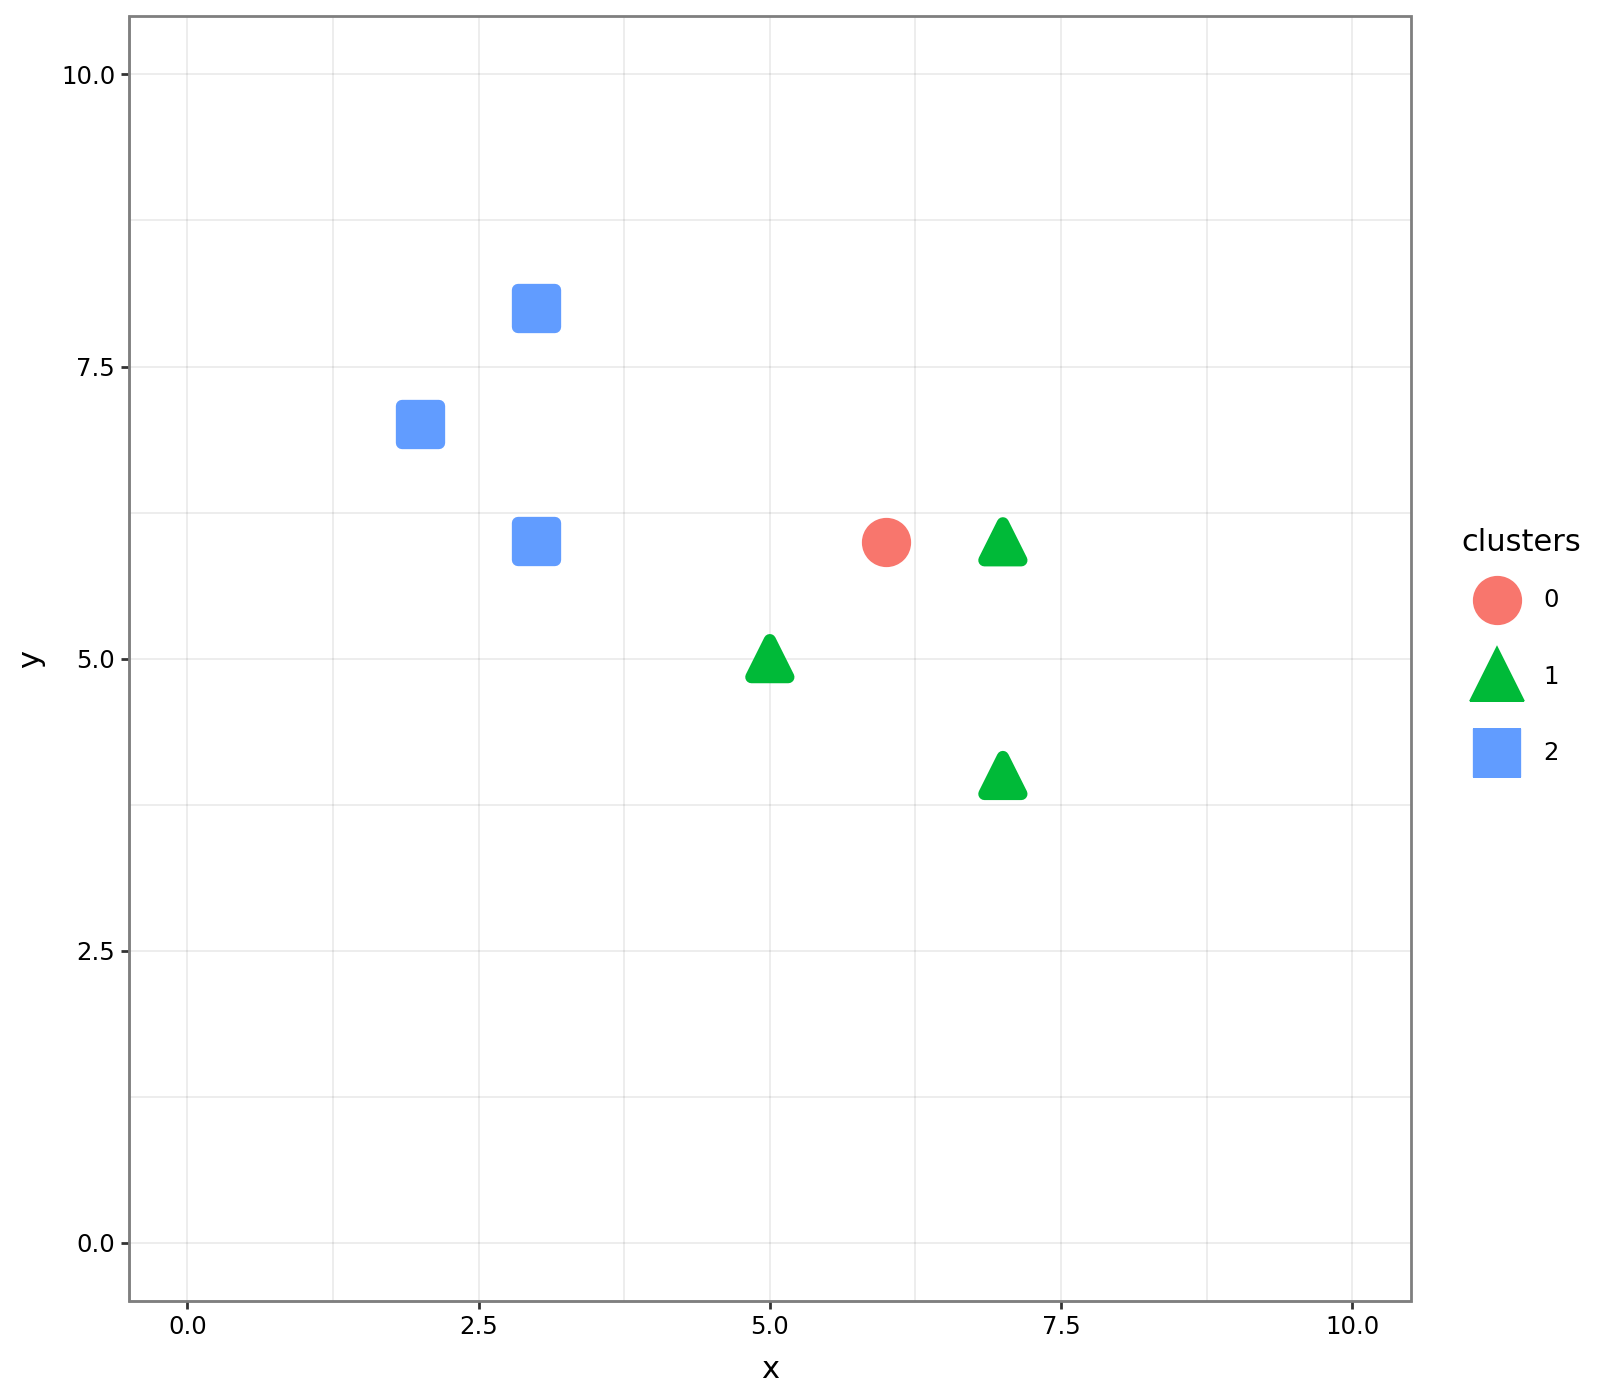

In [57]:
fig = (
    ggplot(data = cluster_data,
          mapping = aes(x = 'x', y = 'y')) +
    geom_point(aes(colour = 'clusters',
                   shape = 'clusters',
                   fill = 'clusters'),
               size = 5.0,
               stroke = 2.5) +
    labs(
        title ='',
        x = 'x',
        y = 'y',
    ) +
    xlim(0, 10) +
    ylim(0, 10) +
    theme_bw() +
    theme(figure_size = (8, 7),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
)
fig

## Choosing the right number of clusters


In [58]:
cluster_data = pd.DataFrame({'x':[2,3,3,5,6,7,7], 'y':[7,6,8,5,6,4,6]})

The **rule of thumb** says that `sqrt(n/2)` is a good estimate.


In [59]:
np.sqrt(cluster_data.shape[0]/2)

np.float64(1.8708286933869707)

How many clusters we would end up having with **Elbow method**?


In [60]:
clustering = KMeans(n_clusters=1, random_state=0).fit(cluster_data)
cluster_centre = clustering.cluster_centers_
print(cluster_centre)

[[4.71428571 6.        ]]


In [61]:
# Compute squared sum of errors or simply, a sum of squared euclidean distances from all points to the centroid
def dist(point1, point2):
  return(np.sqrt(np.sum(np.abs(point1 - point2)**2)))

# Calculate SSE for the current clustering
sse = np.sum(dist(cluster_centre, cluster_data)**2)
print(sse)

35.42857142857143


C:\Users\Saskia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)


As always, `sklearn` is one step ahead of us...


In [62]:
clustering.inertia_

35.42857142857143

## Clustering galery

Here we will indulge ourselves with comparing different clustering algorithms using a panel of interesting datasets.


In [63]:
from sklearn import datasets

np.random.seed(111)
n_samples = 100

# Creating three datasets: circles, moons and no-structure
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_circles_pd = pd.DataFrame({'x':noisy_circles[0][:,0], 'y':noisy_circles[0][:,1], 'clusters':noisy_circles[1]})
noisy_circles_pd['clusters'] = noisy_circles_pd['clusters'].astype('category')

noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
noisy_moons_pd = pd.DataFrame({'x':noisy_moons[0][:,0], 'y':noisy_moons[0][:,1], 'clusters':noisy_moons[1]})
noisy_moons_pd['clusters'] = noisy_moons_pd['clusters'].astype('category')

no_structure = np.random.rand(n_samples, 2), None
no_structure_pd = pd.DataFrame({'x':no_structure[0][:,0], 'y':no_structure[0][:,1], 'clusters':np.zeros(len(no_structure[0]))})
no_structure_pd['clusters'] = no_structure_pd['clusters'].astype('category')


In [64]:
noisy_circles_pd['plot_id'] = 'circles'
noisy_moons_pd['plot_id'] = 'moons'
no_structure_pd['plot_id'] = 'nostructure'

noisy_data_pd = pd.concat([noisy_circles_pd, noisy_moons_pd, no_structure_pd], axis=0)
noisy_data_pd.shape
noisy_data_pd['plot_id'] = noisy_data_pd['plot_id'].astype('category')
noisy_data_pd['clusters'] = noisy_data_pd['clusters'].astype('category')

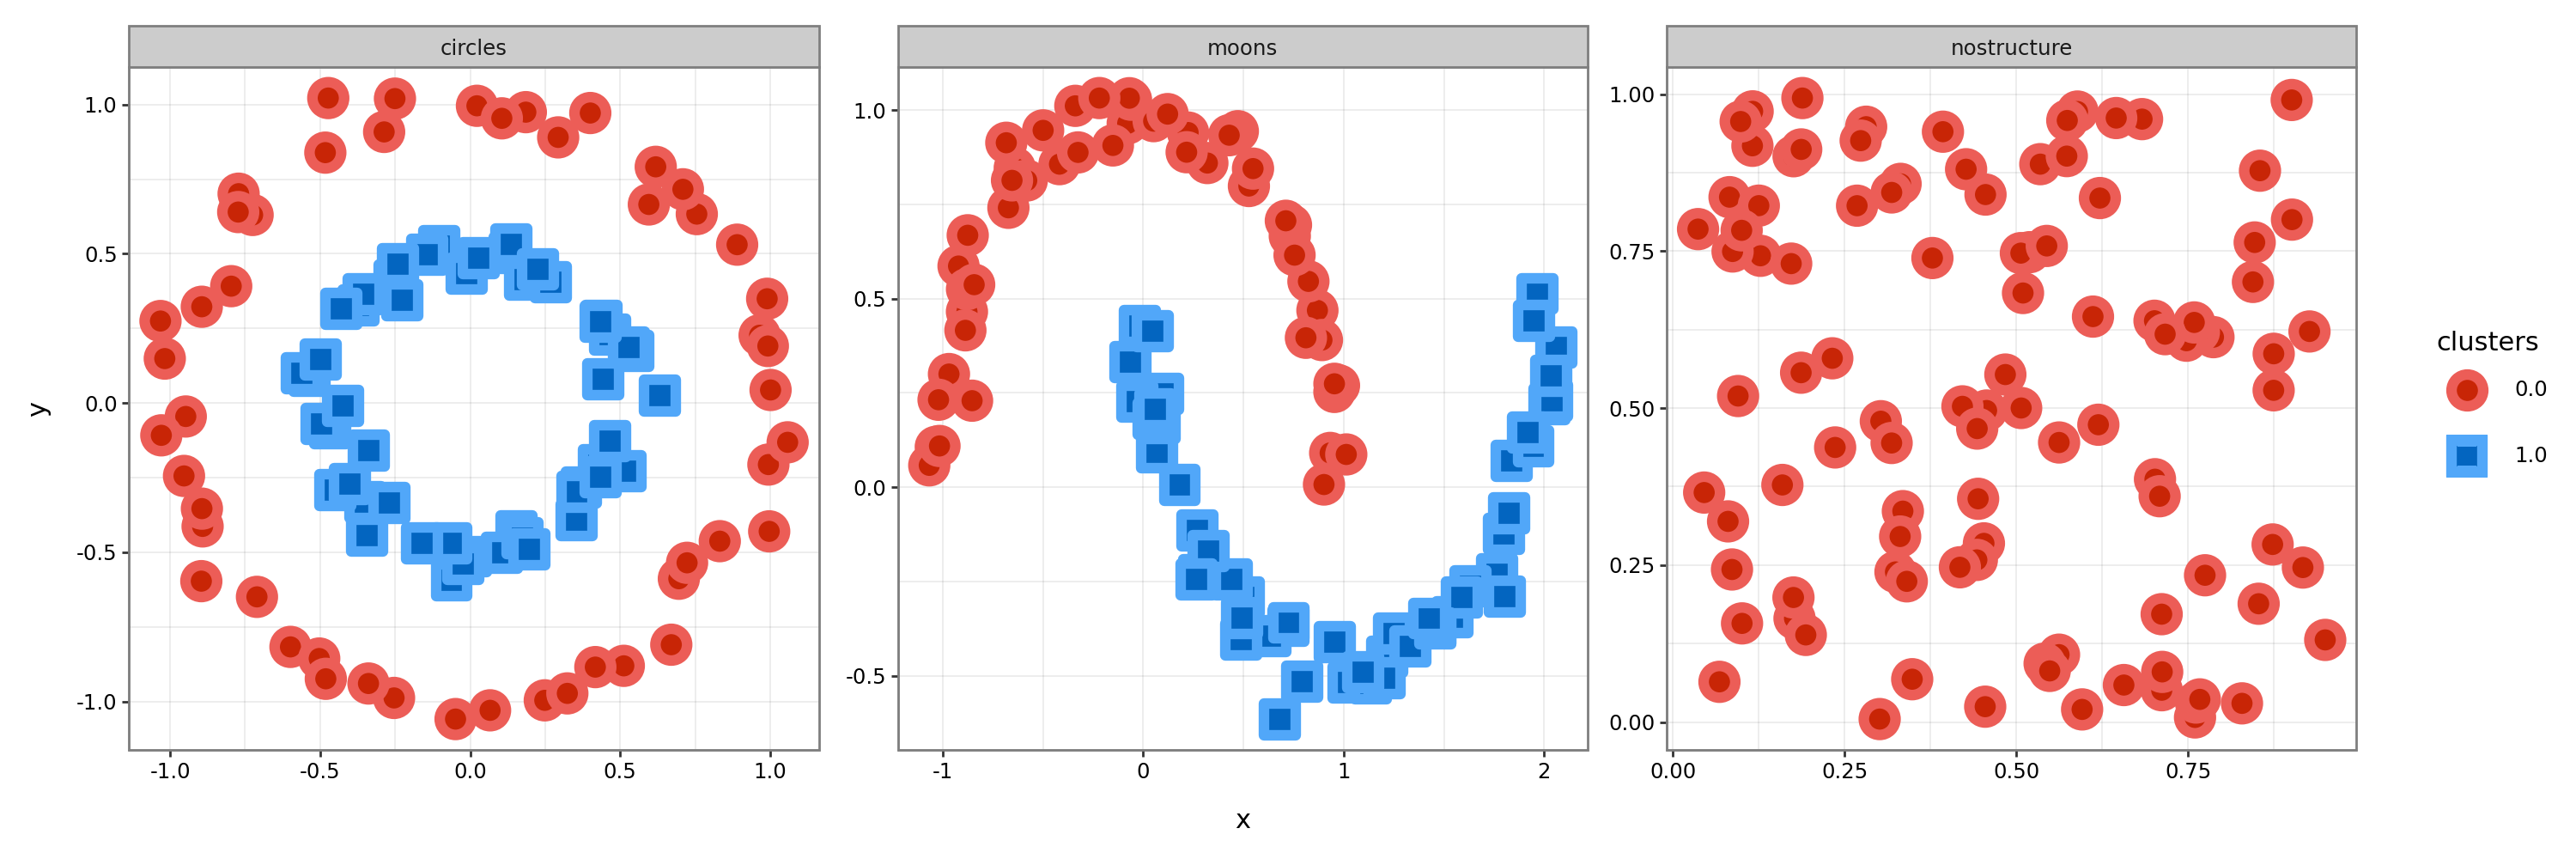

In [65]:
fig = (
    ggplot(data = noisy_data_pd,
          mapping = aes(x = 'x', y = 'y')) +
    geom_point(aes(colour = 'clusters',
                   shape = 'clusters',
                   fill = 'clusters'),
               size = 5.0,
               stroke = 2.5) +
    labs(
        title ='',
        x = 'x',
        y = 'y',
    ) +
    theme_bw() +
    facet_wrap('~plot_id', scales = 'free') +
    scale_color_manual(['#EC5D57', '#51A7F9']) +
    scale_fill_manual(['#C82506', '#0365C0']) +
    scale_shape_manual(['o', 's']) +
    theme(figure_size = (15, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
)

fig

Let's start our degustation from K-means


In [66]:
noisy_circles_pd['predicted'] = KMeans(n_clusters=2, random_state=0, ).fit(noisy_circles_pd[['x','y']]).labels_
noisy_moons_pd['predicted'] = KMeans(n_clusters=2, random_state=0).fit(noisy_moons_pd[['x','y']]).labels_
no_structure_pd['predicted'] = KMeans(n_clusters=2, random_state=0).fit(no_structure_pd[['x','y']]).labels_

noisy_data_pd = pd.concat([noisy_circles_pd, noisy_moons_pd, no_structure_pd], axis=0)
noisy_data_pd.shape
noisy_data_pd['plot_id'] = noisy_data_pd['plot_id'].astype('category')
noisy_data_pd['clusters'] = noisy_data_pd['clusters'].astype('category')
noisy_data_pd['predicted'] = noisy_data_pd['predicted'].astype('category')

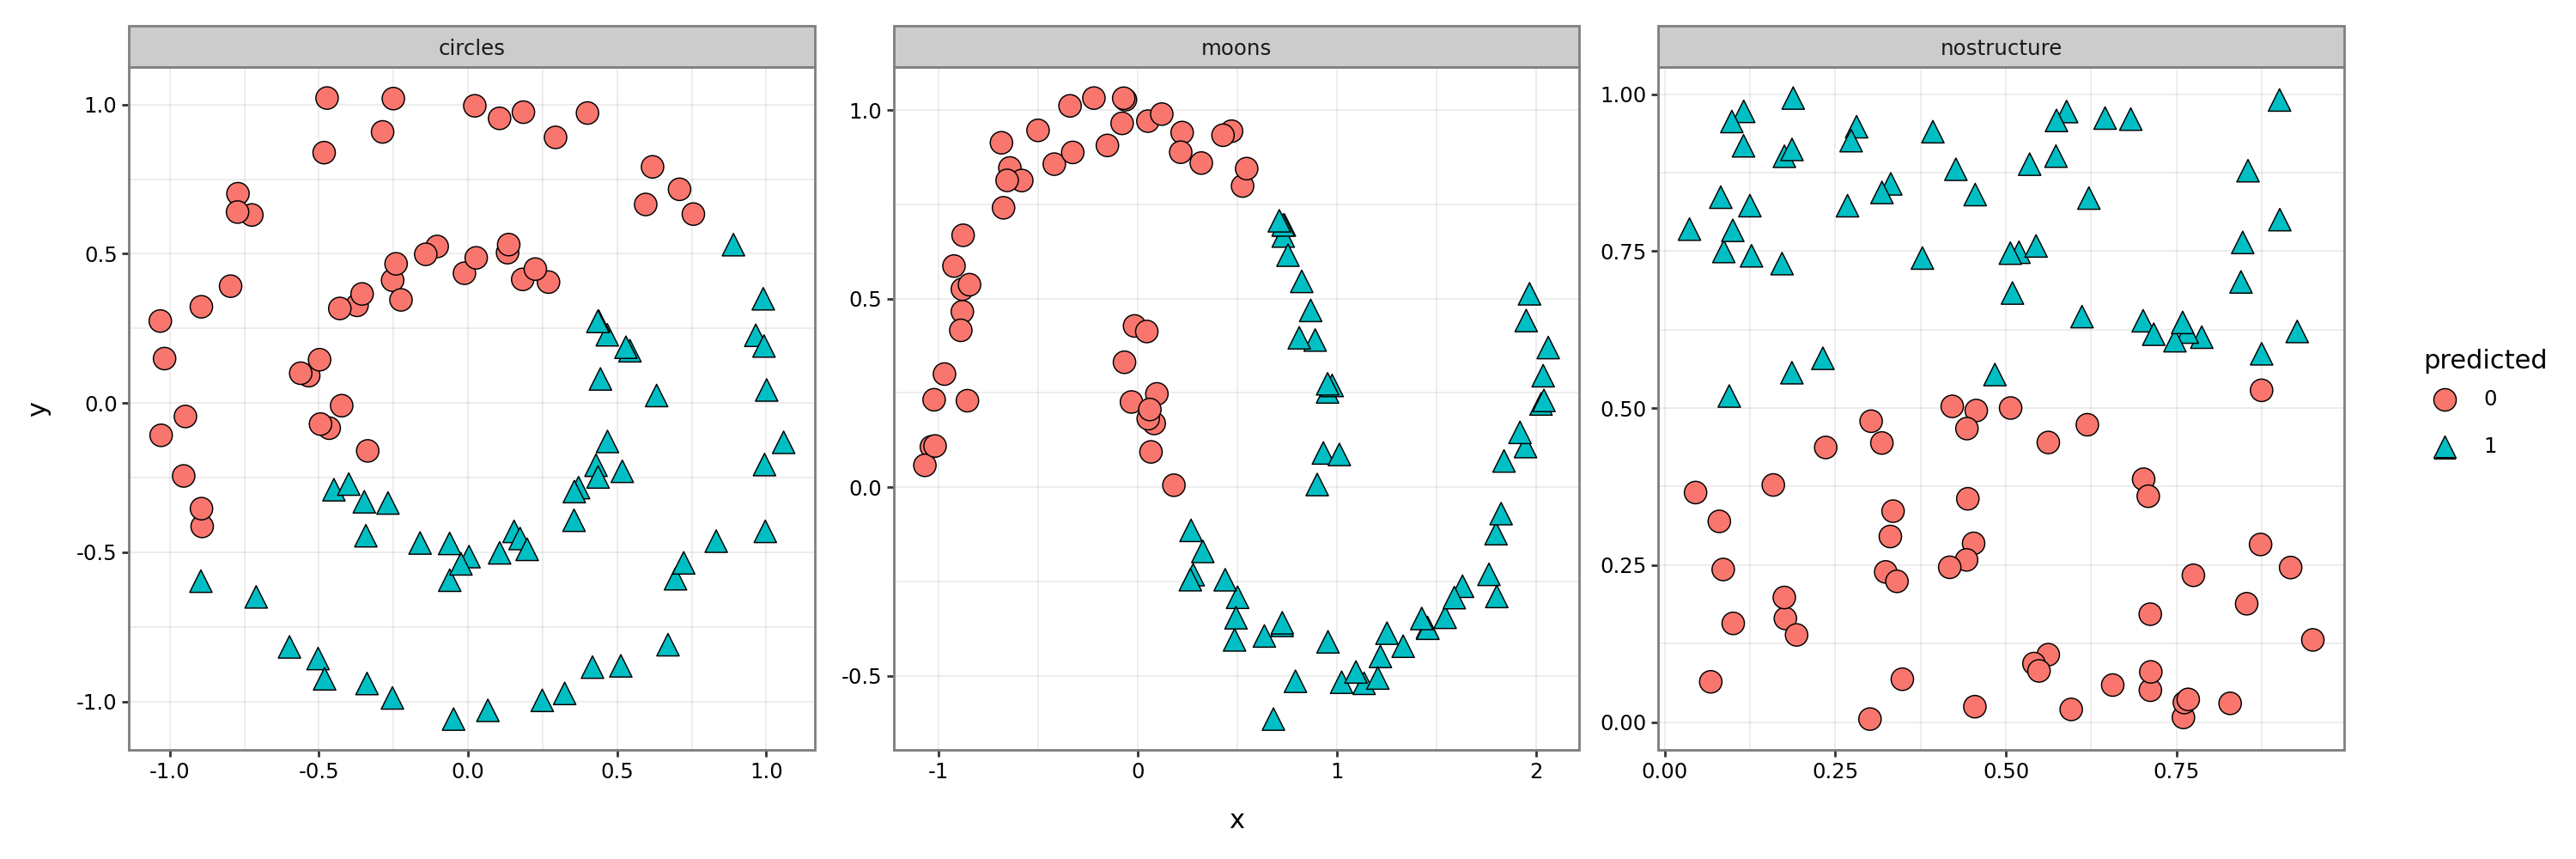

In [67]:
fig = (
    ggplot(data = noisy_data_pd,
          mapping = aes(x = 'x', y = 'y')) +
    geom_point(aes(shape = 'predicted',
                   fill = 'predicted'),
               size = 5.0,
               stroke = 0.3,
               colour = 'black') +
    labs(
        title ='',
        x = 'x',
        y = 'y',
    ) +
    theme_bw() +
    facet_wrap('~plot_id', scales = 'free') +
    theme(figure_size = (15, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
)
fig

Here is a time for some hierarchical clustering


In [68]:
np.random.seed(111)
noisy_circles_pd['predicted'] = AgglomerativeClustering(n_clusters = 2, linkage='single').fit(noisy_circles_pd[['x','y']]).labels_
noisy_moons_pd['predicted'] = AgglomerativeClustering(n_clusters = 2, linkage='single').fit(noisy_moons_pd[['x','y']]).labels_
no_structure_pd['predicted'] = AgglomerativeClustering(n_clusters = 2, linkage='single').fit(no_structure_pd[['x','y']]).labels_

noisy_data_pd = pd.concat([noisy_circles_pd, noisy_moons_pd, no_structure_pd], axis=0)
noisy_data_pd.shape
noisy_data_pd['plot_id'] = noisy_data_pd['plot_id'].astype('category')
noisy_data_pd['clusters'] = noisy_data_pd['clusters'].astype('category')
noisy_data_pd['predicted'] = noisy_data_pd['predicted'].astype('category')

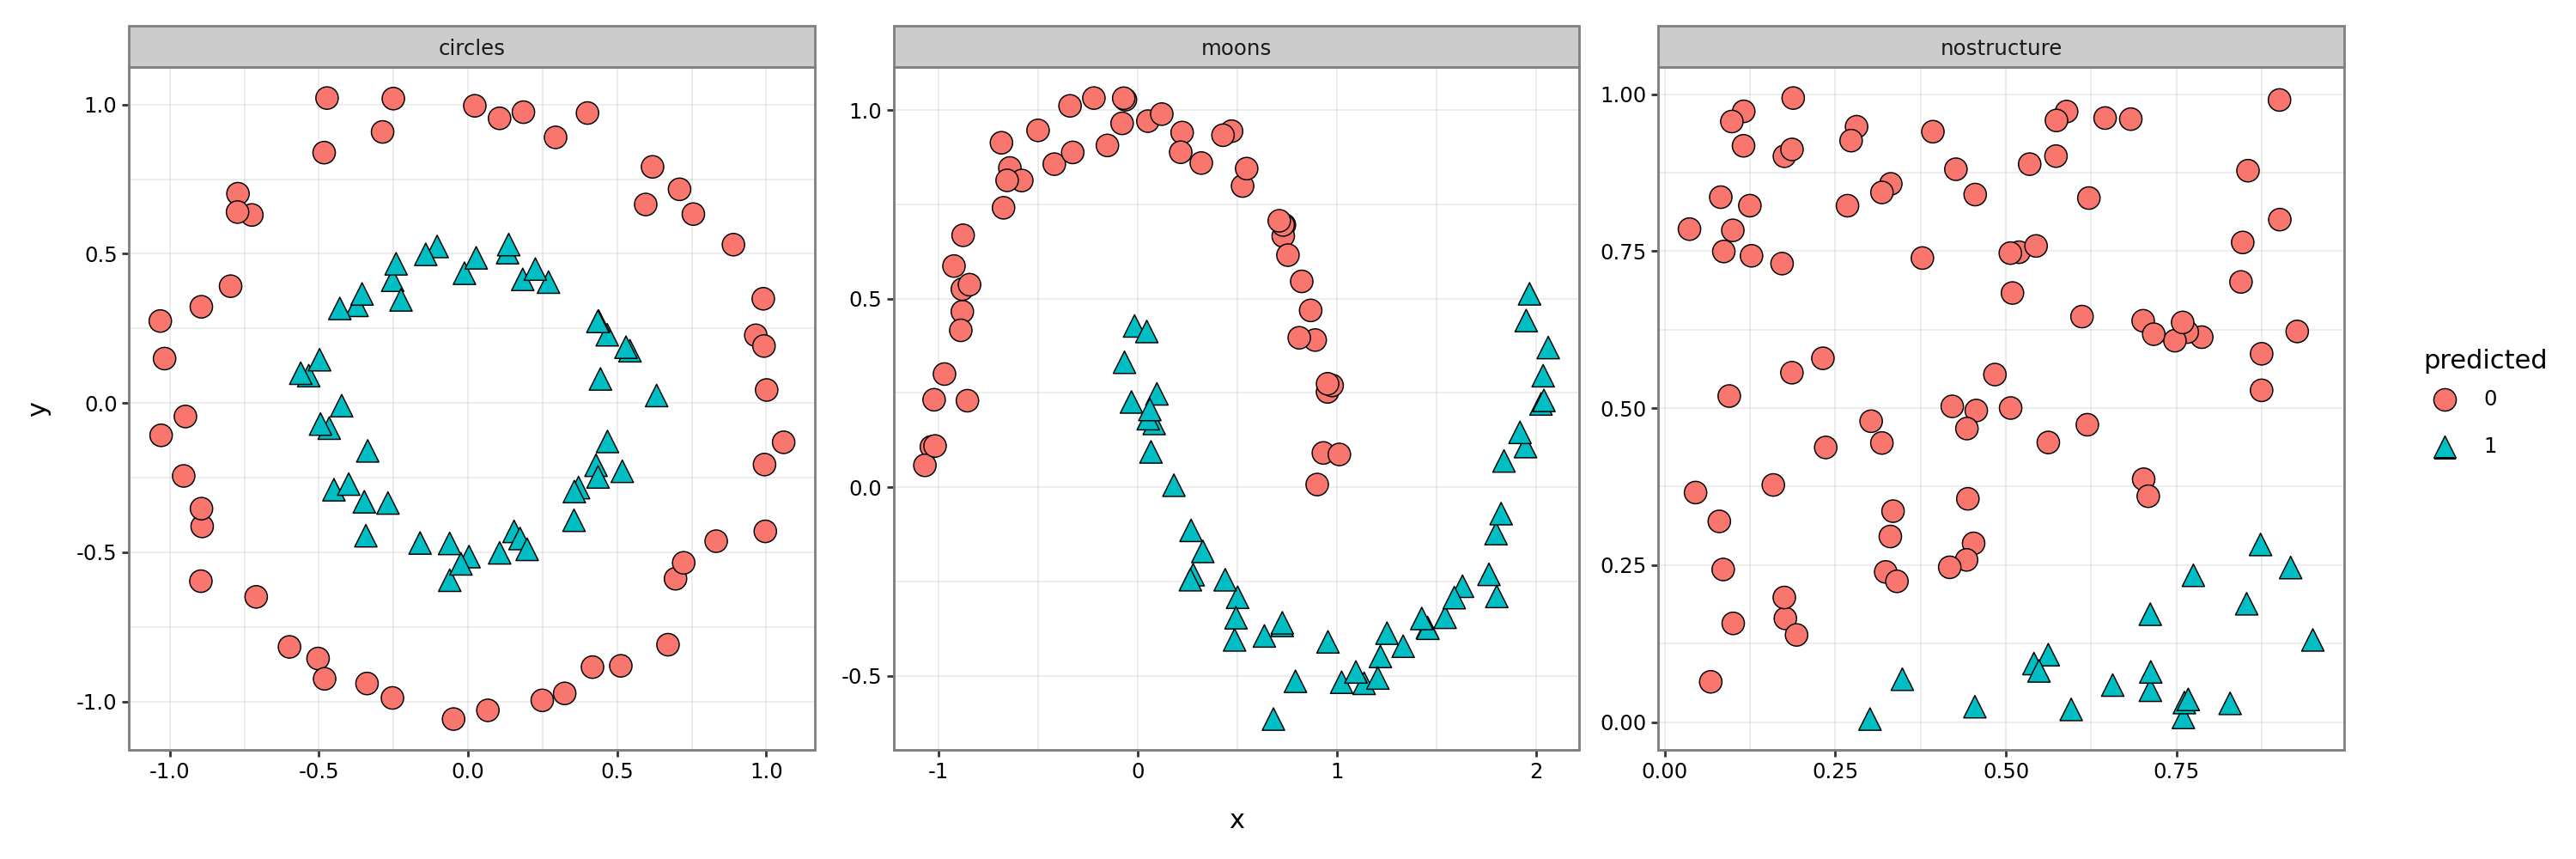

In [69]:
fig = (
    ggplot(data = noisy_data_pd,
          mapping = aes(x = 'x', y = 'y')) +
    geom_point(aes(shape = 'predicted',
                   fill = 'predicted'),
               size = 5.0,
               stroke = 0.3,
               colour = 'black') +
    labs(
        title ='',
        x = 'x',
        y = 'y',
    ) +
    theme_bw() +
    facet_wrap('~plot_id', scales = 'free') +
    theme(figure_size = (15, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
)
fig

Let's apply DBSCAN as well, as it surely implemented in the `sklearn` package as well. Bellow implement DBSCAN with default parameters (eps = 3 and min_samples = 2).


In [71]:
from sklearn.cluster import DBSCAN
np.random.seed(111)
##### YOUR CODE STARTS #####
noisy_circles_pd['predicted'] = DBSCAN(min_samples=2, eps=3).fit(noisy_circles_pd[['x','y']]).labels_
noisy_moons_pd['predicted'] = DBSCAN(min_samples=2, eps=3).fit(noisy_moons_pd[['x','y']]).labels_
no_structure_pd['predicted'] = DBSCAN(min_samples=2, eps=3).fit(no_structure_pd[['x','y']]).labels_
##### YOUR CODE ENDS #####

noisy_data_pd = pd.concat([noisy_circles_pd, noisy_moons_pd, no_structure_pd], axis=0)
noisy_data_pd.shape
noisy_data_pd['plot_id'] = noisy_data_pd['plot_id'].astype('category')
noisy_data_pd['clusters'] = noisy_data_pd['clusters'].astype('category')
noisy_data_pd['predicted'] = noisy_data_pd['predicted'].astype('category')

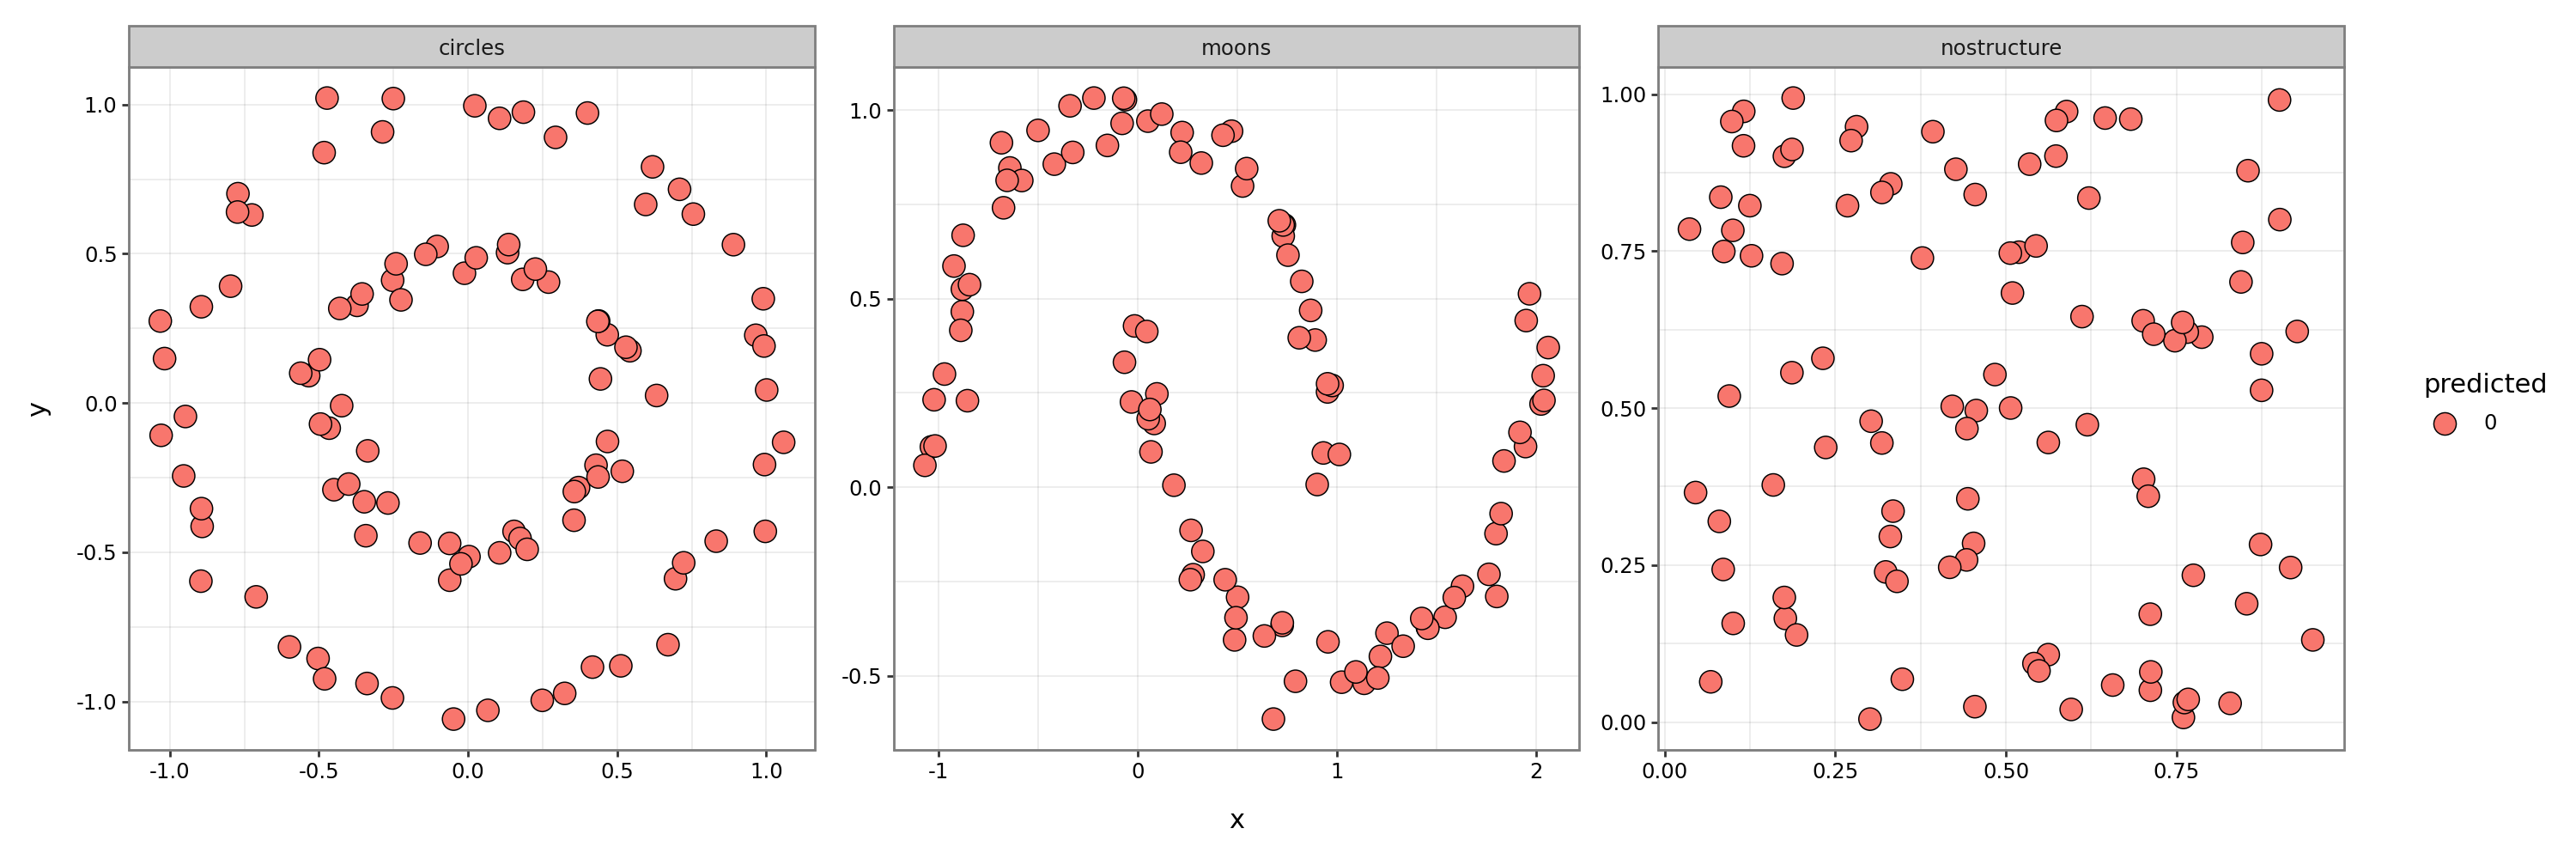

In [72]:
fig = (
    ggplot(data = noisy_data_pd,
          mapping = aes(x = 'x', y = 'y')) +
    geom_point(aes(shape = 'predicted',
                   fill = 'predicted'),
               size = 5.0,
               stroke = 0.3,
               colour = 'black') +
    labs(
        title ='',
        x = 'x',
        y = 'y',
    ) +
    theme_bw() +
    facet_wrap('~plot_id', scales = 'free') +
    theme(figure_size = (15, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
)
fig

Oops... Something isn't right.

<font color=purple size=4> What is wrong?
</font>


In [ ]:
# eps/redius is too large

In [84]:
from sklearn.cluster import DBSCAN
np.random.seed(111)
##### YOUR CODE STARTS #####
noisy_circles_pd['predicted'] = DBSCAN(min_samples=2, eps=0.3).fit(noisy_circles_pd[['x','y']]).labels_
noisy_moons_pd['predicted'] = DBSCAN(min_samples=2, eps=0.3).fit(noisy_moons_pd[['x','y']]).labels_
no_structure_pd['predicted'] = DBSCAN(min_samples=2, eps=0.3).fit(no_structure_pd[['x','y']]).labels_

##### YOUR CODE ENDS #####

noisy_data_pd = pd.concat([noisy_circles_pd, noisy_moons_pd, no_structure_pd], axis=0)
noisy_data_pd.shape
noisy_data_pd['plot_id'] = noisy_data_pd['plot_id'].astype('category')
noisy_data_pd['clusters'] = noisy_data_pd['clusters'].astype('category')
noisy_data_pd['predicted'] = noisy_data_pd['predicted'].astype('category')

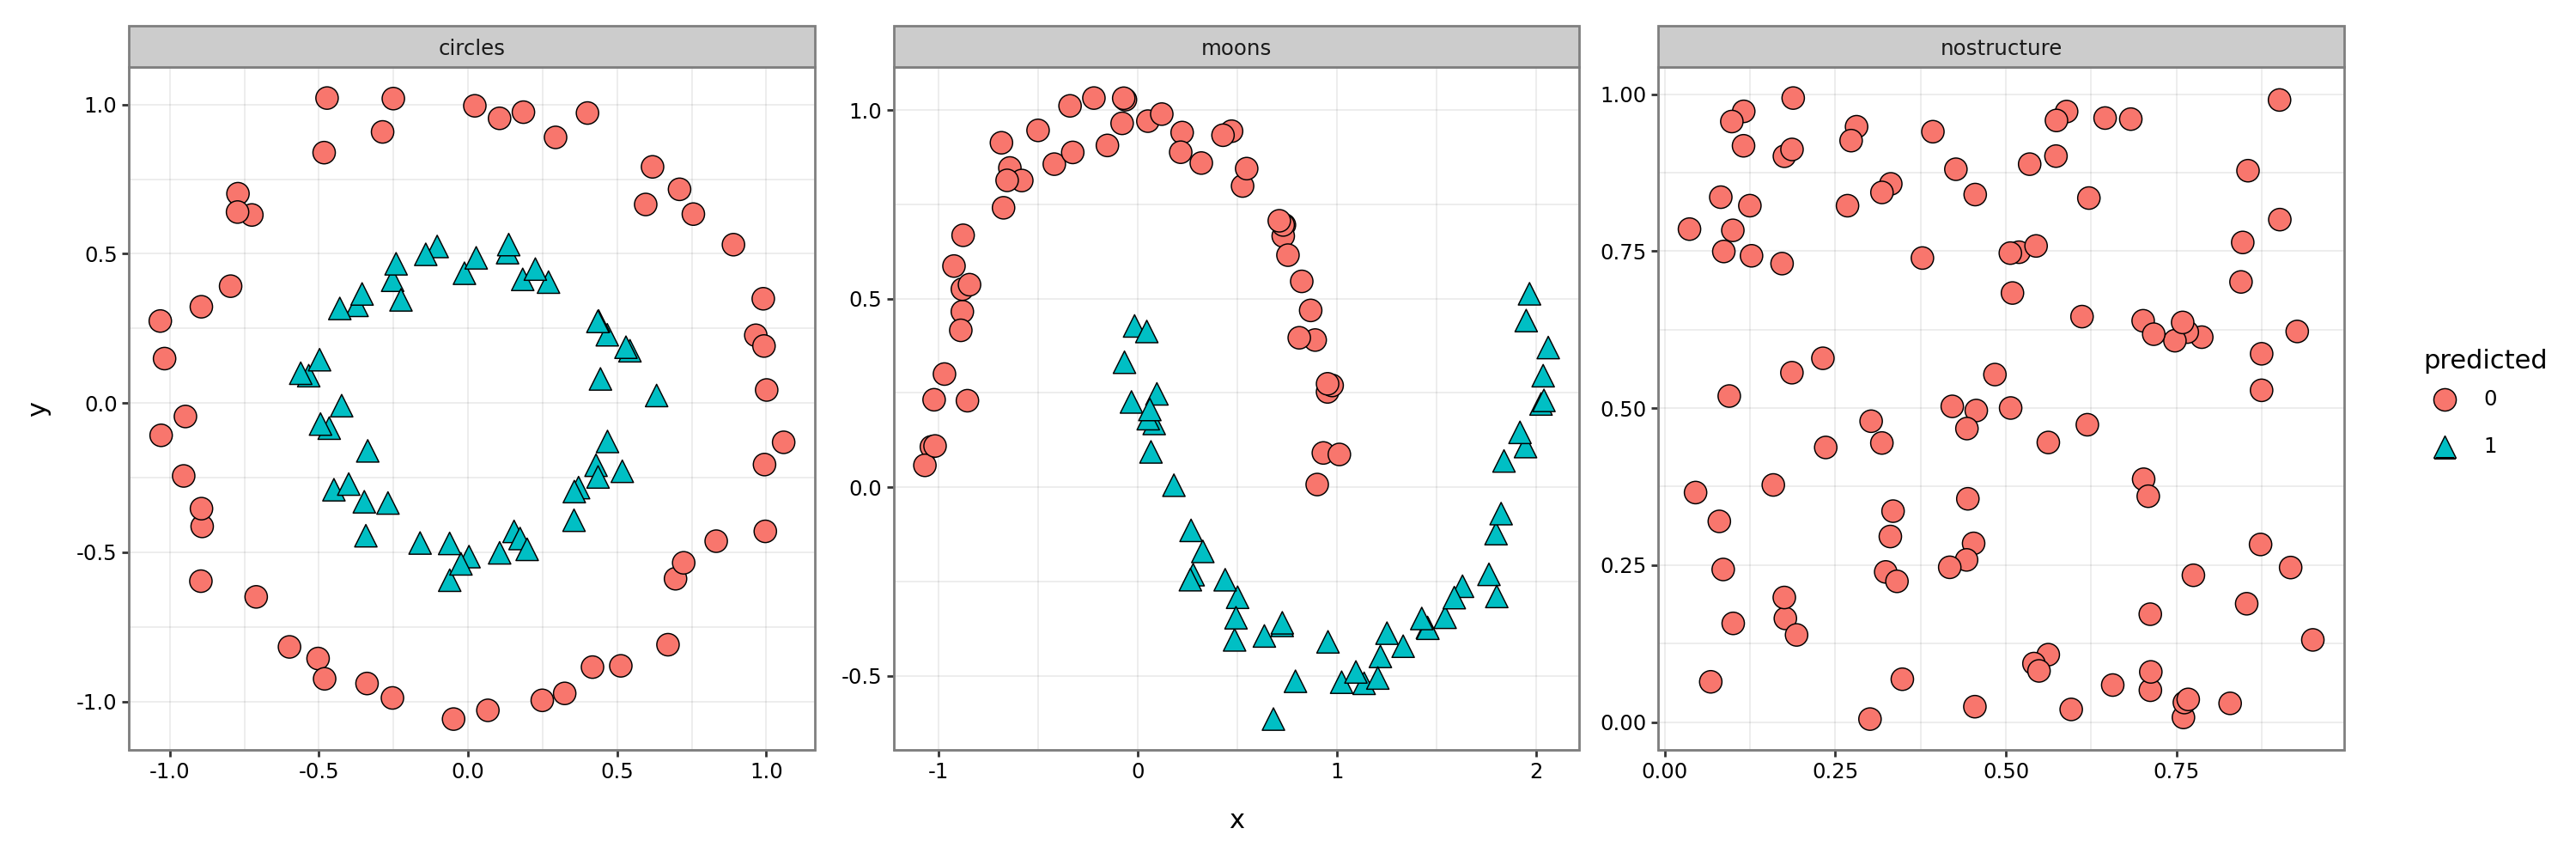

In [85]:
fig = (
    ggplot(data = noisy_data_pd,
          mapping = aes(x = 'x', y = 'y')) +
    geom_point(aes(shape = 'predicted',
                   fill = 'predicted'),
               size = 5.0,
               stroke = 0.3,
               colour = 'black') +
    labs(
        title ='',
        x = 'x',
        y = 'y',
    ) +
    theme_bw() +
    facet_wrap('~plot_id', scales = 'free') +
    theme(figure_size = (15, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
)
fig

In [ ]:
# Epsilon is guesstimation lol
# You could use silhouette method to find epsilon, find min value from there...

The End.
